<a href="https://colab.research.google.com/github/MRFRiwaldi/HYBRID-CNN-LSTM/blob/main/HYBRID_CNN_%2B_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***PREPROCESSING DATA***

In [148]:
import pandas as pd

data = pd.read_csv("merged_mbg_dataset.csv")
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3504 entries, 0 to 3503
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        3504 non-null   object
 1   username    2921 non-null   object
 2   date        3049 non-null   object
 3   platform    3504 non-null   object
 4   engagement  3504 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 137.0+ KB


text        username  \
0  Seandainya dia ikut keracunan , saya ikut bers...       riyan7540   
1  MBG gak salah pak. Hanya alur dan prosesnya ha...  nurwinda_talab   
2  Bukannya waktu kampanyenya bilang nya bantuan ...      petirdakco   
3  Coba besok yg keracunan jan ethes 🗿 apa bisa l...       faqih_dna   
4                           Coba lu yg keracunan deh     tiges_merch   
5  negara wajib melindungi setiap anak, bukan han...       syrfhbela   
6  Pak, ga takut doa2 orangtua yg tiap hari khawa...       gemmazani   
7  Dia habis digampar pake ompreng, otaknya goyan...       me_we2023   
8  @txtdrimedia Di ajarin memasak juga pak. Supay...             NaN   
9  @therra_ @prabowo Iya gak pernah ada siswa sis...             NaN   

              date        platform  engagement  
0  10/6/2025 23:02  Instagram_Reel           0  
1  10/6/2025 19:37       Instagram           0  
2  10/6/2025 19:25       Instagram           0  
3  10/6/2025 17:07  Instagram_Reel           0  
4  10/6/2025 13:33  Instagram_Reel           0  
5  10/6/2025 13:23       Instagram           0  
6  10/6/2025 11:59  Instagram_Reel           0  
7  10/6/2025 10:20  Instagram_Reel           0  
8   10/6/2025 7:04         Twitter           0  
9   10/6/2025 7:02         Twitter           0

In [149]:
df  = pd.DataFrame(data[['text']])
df.head(5)

text
0  Seandainya dia ikut keracunan , saya ikut bers...
1  MBG gak salah pak. Hanya alur dan prosesnya ha...
2  Bukannya waktu kampanyenya bilang nya bantuan ...
3  Coba besok yg keracunan jan ethes 🗿 apa bisa l...
4                           Coba lu yg keracunan deh

**PROSES HAPUS DATA DUPLIKAT**

---



In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3504 entries, 0 to 3503
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3504 non-null   object
dtypes: object(1)
memory usage: 27.5+ KB


In [151]:
df.drop_duplicates(subset ="text", keep = 'first', inplace = True)

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3504 entries, 0 to 3503
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3504 non-null   object
dtypes: object(1)
memory usage: 27.5+ KB


**PROSES CLEANING**

---



In [153]:
import re
import string
import nltk

# Fungsi untuk menghapus URL
def remove_URL(tweet):
    if tweet is not None and isinstance(tweet, str):
        url = re.compile(r'https?://\S+|www\.\S+')
        return url.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus HTML
def remove_html(tweet):
    if tweet is not None and isinstance(tweet, str):
        html = re.compile(r'<.*?>')
        return html.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus emoji
def remove_emoji(tweet):
    if tweet is not None and isinstance(tweet, str):
        emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F700-\U0001F77F"  # alchemical symbols
            u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
            u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
            u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
            u"\U0001FA00-\U0001FA6F"  # Chess Symbols
            u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
            u"\U0001F004-\U0001F0CF"  # Additional emoticons
            u"\U0001F1E0-\U0001F1FF"  # flags
                               "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus simbol
def remove_symbols(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
    return tweet

# Fungsi untuk menghapus angka
def remove_numbers(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'\d', '', tweet)
    return tweet

# Fungsi hapus username
def remove_usernames(text):
    if text is not None and isinstance(text, str):
        return re.sub(r'@\w+', '', text)
    else:
        return text

df['cleaning'] = df['text'].apply(lambda x: remove_URL(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_usernames(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_html(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_emoji(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_symbols(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_numbers(x))

df.head(5)

text  \
0  Seandainya dia ikut keracunan , saya ikut bers...   
1  MBG gak salah pak. Hanya alur dan prosesnya ha...   
2  Bukannya waktu kampanyenya bilang nya bantuan ...   
3  Coba besok yg keracunan jan ethes 🗿 apa bisa l...   
4                           Coba lu yg keracunan deh   

                                            cleaning  
0  Seandainya dia ikut keracunan  saya ikut bersy...  
1  MBG gak salah pak Hanya alur dan prosesnya har...  
2  Bukannya waktu kampanyenya bilang nya bantuan ...  
3  Coba besok yg keracunan jan ethes  apa bisa lu...  
4                           Coba lu yg keracunan deh

**PROSES CASE FOLDING**

---



In [154]:
def case_folding(text):
    if isinstance(text, str):
        lowercase_text = text.lower()
        return lowercase_text
    else:
        return text

df['case_folding'] = df['cleaning'].apply(case_folding)
df.head(5)

text  \
0  Seandainya dia ikut keracunan , saya ikut bers...   
1  MBG gak salah pak. Hanya alur dan prosesnya ha...   
2  Bukannya waktu kampanyenya bilang nya bantuan ...   
3  Coba besok yg keracunan jan ethes 🗿 apa bisa l...   
4                           Coba lu yg keracunan deh   

                                            cleaning  \
0  Seandainya dia ikut keracunan  saya ikut bersy...   
1  MBG gak salah pak Hanya alur dan prosesnya har...   
2  Bukannya waktu kampanyenya bilang nya bantuan ...   
3  Coba besok yg keracunan jan ethes  apa bisa lu...   
4                           Coba lu yg keracunan deh   

                                        case_folding  
0  seandainya dia ikut keracunan  saya ikut bersy...  
1  mbg gak salah pak hanya alur dan prosesnya har...  
2  bukannya waktu kampanyenya bilang nya bantuan ...  
3  coba besok yg keracunan jan ethes  apa bisa lu...  
4                           coba lu yg keracunan deh

**Normalisasi Kata**

---



In [155]:
import pandas as pd
import requests
from io import BytesIO

# Fungsi penggantian kata tidak baku
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
            else:
                replaced_words.append(word)
        replaced_text = ' '.join(replaced_words)
    else:
        replaced_text = ''
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

# Baca dataset kamu (pastikan df sudah tersedia)
data = pd.DataFrame(df[['text','cleaning','case_folding']])
data.head()

text  \
0  Seandainya dia ikut keracunan , saya ikut bers...   
1  MBG gak salah pak. Hanya alur dan prosesnya ha...   
2  Bukannya waktu kampanyenya bilang nya bantuan ...   
3  Coba besok yg keracunan jan ethes 🗿 apa bisa l...   
4                           Coba lu yg keracunan deh   

                                            cleaning  \
0  Seandainya dia ikut keracunan  saya ikut bersy...   
1  MBG gak salah pak Hanya alur dan prosesnya har...   
2  Bukannya waktu kampanyenya bilang nya bantuan ...   
3  Coba besok yg keracunan jan ethes  apa bisa lu...   
4                           Coba lu yg keracunan deh   

                                        case_folding  
0  seandainya dia ikut keracunan  saya ikut bersy...  
1  mbg gak salah pak hanya alur dan prosesnya har...  
2  bukannya waktu kampanyenya bilang nya bantuan ...  
3  coba besok yg keracunan jan ethes  apa bisa lu...  
4                           coba lu yg keracunan deh

In [156]:
# Unduh dan baca kamus dari GitHub
kamus_data = pd.read_excel("kamuskatabaku.xlsx")

# Buat dictionary dari kamus
kamus_tidak_baku_dict = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

In [157]:
# Terapkan fungsi normalisasi
data[['normalisasi', 'Kata_Baku', 'Kata_Tidak_Baku', 'Kata_Tidak_Baku_Hash']] = data['case_folding'].apply(
    lambda x: pd.Series(replace_taboo_words(x, kamus_tidak_baku_dict))
)

# Ambil kolom yang relevan
df = pd.DataFrame(data[['text','cleaning','case_folding','normalisasi']])
df.head(5)

text  \
0  Seandainya dia ikut keracunan , saya ikut bers...   
1  MBG gak salah pak. Hanya alur dan prosesnya ha...   
2  Bukannya waktu kampanyenya bilang nya bantuan ...   
3  Coba besok yg keracunan jan ethes 🗿 apa bisa l...   
4                           Coba lu yg keracunan deh   

                                            cleaning  \
0  Seandainya dia ikut keracunan  saya ikut bersy...   
1  MBG gak salah pak Hanya alur dan prosesnya har...   
2  Bukannya waktu kampanyenya bilang nya bantuan ...   
3  Coba besok yg keracunan jan ethes  apa bisa lu...   
4                           Coba lu yg keracunan deh   

                                        case_folding  \
0  seandainya dia ikut keracunan  saya ikut bersy...   
1  mbg gak salah pak hanya alur dan prosesnya har...   
2  bukannya waktu kampanyenya bilang nya bantuan ...   
3  coba besok yg keracunan jan ethes  apa bisa lu...   
4                           coba lu yg keracunan deh   

                                         normalisasi  
0  seandainya dia ikut keracunan saya ikut bersyukur  
1  mbg tidak salah pak hanya alur dan prosesnya h...  
2  bukannya waktu kampanyenya bilang ya bantuan m...  
3  coba besok yang keracunan jangan ethes apa bis...  
4                       coba kamu yang keracunan deh

**TOKENIZATION**

---



In [158]:
def tokenize(text):
    tokens = text.split()
    return tokens

df['tokenize'] = df['normalisasi'].apply(tokenize)

df.head(5)

text  \
0  Seandainya dia ikut keracunan , saya ikut bers...   
1  MBG gak salah pak. Hanya alur dan prosesnya ha...   
2  Bukannya waktu kampanyenya bilang nya bantuan ...   
3  Coba besok yg keracunan jan ethes 🗿 apa bisa l...   
4                           Coba lu yg keracunan deh   

                                            cleaning  \
0  Seandainya dia ikut keracunan  saya ikut bersy...   
1  MBG gak salah pak Hanya alur dan prosesnya har...   
2  Bukannya waktu kampanyenya bilang nya bantuan ...   
3  Coba besok yg keracunan jan ethes  apa bisa lu...   
4                           Coba lu yg keracunan deh   

                                        case_folding  \
0  seandainya dia ikut keracunan  saya ikut bersy...   
1  mbg gak salah pak hanya alur dan prosesnya har...   
2  bukannya waktu kampanyenya bilang nya bantuan ...   
3  coba besok yg keracunan jan ethes  apa bisa lu...   
4                           coba lu yg keracunan deh   

                                         normalisasi  \
0  seandainya dia ikut keracunan saya ikut bersyukur   
1  mbg tidak salah pak hanya alur dan prosesnya h...   
2  bukannya waktu kampanyenya bilang ya bantuan m...   
3  coba besok yang keracunan jangan ethes apa bis...   
4                       coba kamu yang keracunan deh   

                                            tokenize  
0  [seandainya, dia, ikut, keracunan, saya, ikut,...  
1  [mbg, tidak, salah, pak, hanya, alur, dan, pro...  
2  [bukannya, waktu, kampanyenya, bilang, ya, ban...  
3  [coba, besok, yang, keracunan, jangan, ethes, ...  
4                 [coba, kamu, yang, keracunan, deh]

**PROSES STOPWORD REMOVAL**

---



In [167]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [168]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

# Ubah hasil list jadi string
df['stopword removal'] = df['tokenize'].apply(
    lambda x: " ".join(remove_stopwords(x))
)

df.head(5)

text  \
0  Seandainya dia ikut keracunan , saya ikut bers...   
1  MBG gak salah pak. Hanya alur dan prosesnya ha...   
2  Bukannya waktu kampanyenya bilang nya bantuan ...   
3  Coba besok yg keracunan jan ethes 🗿 apa bisa l...   
4                           Coba lu yg keracunan deh   

                                            cleaning  \
0  Seandainya dia ikut keracunan  saya ikut bersy...   
1  MBG gak salah pak Hanya alur dan prosesnya har...   
2  Bukannya waktu kampanyenya bilang nya bantuan ...   
3  Coba besok yg keracunan jan ethes  apa bisa lu...   
4                           Coba lu yg keracunan deh   

                                        case_folding  \
0  seandainya dia ikut keracunan  saya ikut bersy...   
1  mbg gak salah pak hanya alur dan prosesnya har...   
2  bukannya waktu kampanyenya bilang nya bantuan ...   
3  coba besok yg keracunan jan ethes  apa bisa lu...   
4                           coba lu yg keracunan deh   

                                         normalisasi  \
0  seandainya dia ikut keracunan saya ikut bersyukur   
1  mbg tidak salah pak hanya alur dan prosesnya h...   
2  bukannya waktu kampanyenya bilang ya bantuan m...   
3  coba besok yang keracunan jangan ethes apa bis...   
4                       coba kamu yang keracunan deh   

                                            tokenize  \
0  [seandainya, dia, ikut, keracunan, saya, ikut,...   
1  [mbg, tidak, salah, pak, hanya, alur, dan, pro...   
2  [bukannya, waktu, kampanyenya, bilang, ya, ban...   
3  [coba, besok, yang, keracunan, jangan, ethes, ...   
4                 [coba, kamu, yang, keracunan, deh]   

                                    stopword removal  \
0                     seandainya keracunan bersyukur   
1  mbg salah alur prosesnya diperbaiki dapur mbg ...   
2       kampanyenya bilang ya bantuan mbg dana china   
3               coba besok keracunan ethes mengomong   
4                                 coba keracunan deh   

                                        steming_data  
0                                  anda racun syukur  
1  mbg salah alur proses baik dapur mbg layan rib...  
2            kampanye bilang ya bantu mbg dana china  
3                       coba besok racun ethes omong  
4                                     coba racun deh

**PROSES STEAMING DATA**

---



In [161]:
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

In [162]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    if isinstance(text, str):
        # Split string jadi list kata terlebih dahulu
        words = text.split()
        # Stem setiap kata
        stemmed_words = [stemmer.stem(word) for word in words]
        return ' '.join(stemmed_words)
    return text

# Terapkan ke DataFrame
df['steming_data'] = df['stopword removal'].apply(stem_text)
df.head(5)


text  \
0  Seandainya dia ikut keracunan , saya ikut bers...   
1  MBG gak salah pak. Hanya alur dan prosesnya ha...   
2  Bukannya waktu kampanyenya bilang nya bantuan ...   
3  Coba besok yg keracunan jan ethes 🗿 apa bisa l...   
4                           Coba lu yg keracunan deh   

                                            cleaning  \
0  Seandainya dia ikut keracunan  saya ikut bersy...   
1  MBG gak salah pak Hanya alur dan prosesnya har...   
2  Bukannya waktu kampanyenya bilang nya bantuan ...   
3  Coba besok yg keracunan jan ethes  apa bisa lu...   
4                           Coba lu yg keracunan deh   

                                        case_folding  \
0  seandainya dia ikut keracunan  saya ikut bersy...   
1  mbg gak salah pak hanya alur dan prosesnya har...   
2  bukannya waktu kampanyenya bilang nya bantuan ...   
3  coba besok yg keracunan jan ethes  apa bisa lu...   
4                           coba lu yg keracunan deh   

                                         normalisasi  \
0  seandainya dia ikut keracunan saya ikut bersyukur   
1  mbg tidak salah pak hanya alur dan prosesnya h...   
2  bukannya waktu kampanyenya bilang ya bantuan m...   
3  coba besok yang keracunan jangan ethes apa bis...   
4                       coba kamu yang keracunan deh   

                                            tokenize  \
0  [seandainya, dia, ikut, keracunan, saya, ikut,...   
1  [mbg, tidak, salah, pak, hanya, alur, dan, pro...   
2  [bukannya, waktu, kampanyenya, bilang, ya, ban...   
3  [coba, besok, yang, keracunan, jangan, ethes, ...   
4                 [coba, kamu, yang, keracunan, deh]   

                                    stopword removal  \
0                     seandainya keracunan bersyukur   
1  mbg salah alur prosesnya diperbaiki dapur mbg ...   
2       kampanyenya bilang ya bantuan mbg dana china   
3               coba besok keracunan ethes mengomong   
4                                 coba keracunan deh   

                                        steming_data  
0                                  anda racun syukur  
1  mbg salah alur proses baik dapur mbg layan rib...  
2            kampanye bilang ya bantu mbg dana china  
3                       coba besok racun ethes omong  
4                                     coba racun deh

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3504 entries, 0 to 3503
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   text              3504 non-null   object
 1   cleaning          3504 non-null   object
 2   case_folding      3504 non-null   object
 3   normalisasi       3504 non-null   object
 4   tokenize          3504 non-null   object
 5   stopword removal  3504 non-null   object
 6   steming_data      3504 non-null   object
dtypes: object(7)
memory usage: 191.8+ KB


**PROSES HAPUS DATA BERNILAI KOSONG (NAN)**

---



In [164]:
data = df.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3504 entries, 0 to 3503
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   text              3504 non-null   object
 1   cleaning          3504 non-null   object
 2   case_folding      3504 non-null   object
 3   normalisasi       3504 non-null   object
 4   tokenize          3504 non-null   object
 5   stopword removal  3504 non-null   object
 6   steming_data      3504 non-null   object
dtypes: object(7)
memory usage: 191.8+ KB


**WORDCLOUD SETELAH PREPROCESSING**

---



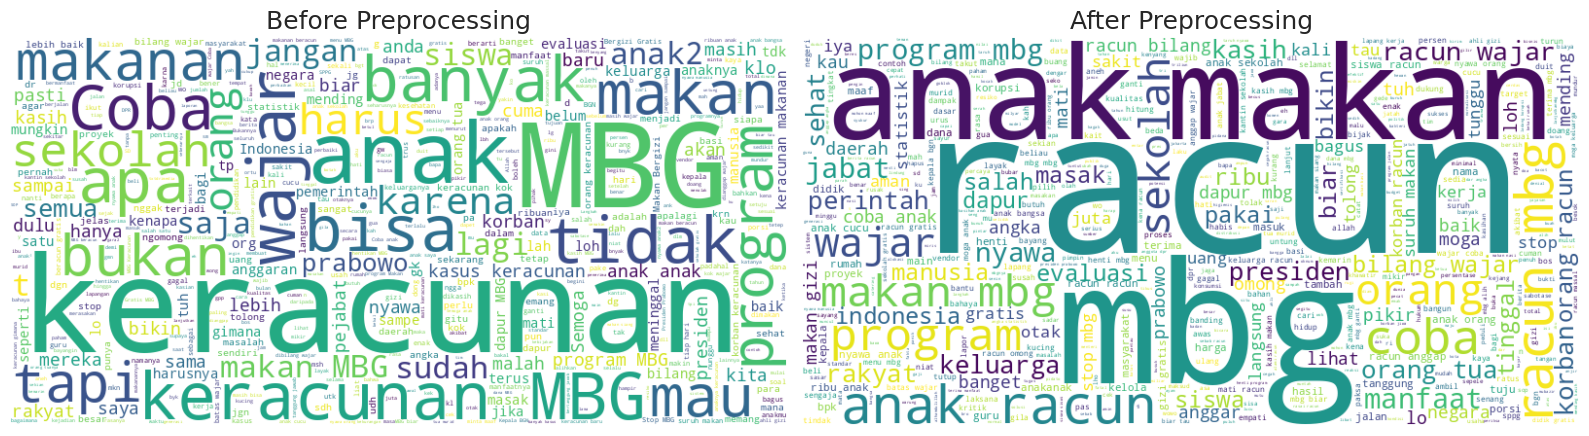

✓ Gambar tersimpan: wordcloud_comparison_mbg.png


<Figure size 640x480 with 0 Axes>

In [169]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Stopwords yang optimal untuk analisis sentimen MBG
stopwords = set(STOPWORDS)
stopwords.update([
    # Kata hubung & penunjuk (tidak bermakna)
    'yg', 'yang', 'nya', 'di', 'ke', 'dari', 'dan', 'atau',
    'ini', 'itu', 'ada', 'untuk', 'pada', 'dengan', 'juga',

    # Kata keterangan umum (filler)
    'aja', 'sih', 'gak', 'ga', 'ya', 'kayak', 'nih', 'deh',
    'kan', 'kalo', 'kalau', 'jadi', 'buat', 'udah', 'sdh' 'wajar',

    # Kata ganti umum (tidak spesifik)
    'lu', 'gue', 'dia', 'pak', 'bapak', 'kamu', 'kami',

    # Kata filler media sosial
    'fyp', 'cs', 'termul', 'ok', 'gas', 'omon', 'nyinyir', 'sty',

    # Kata teknis tidak relevan
    'https', 'co', 'rt', 'amp', 'update', 'apk', 'ajar',

    # Angka dan simbol
    '1', '2', '3', '...', 'si'
])

# WordCloud Before (dari kolom 'Review Text')
text_before = ' '.join(
    data['text']
    .astype(str)
    .tolist()
)

wc_before = WordCloud(
    stopwords=stopwords,
    background_color="white",
    max_words=500,
    width=800,
    height=400
).generate(text_before)

text_after = ' '.join(
    [" ".join(eval(x) if isinstance(x, str) and x.startswith('[') else x.split())
     for x in data['steming_data'].astype(str)]
)

wc_after = WordCloud(
    stopwords=stopwords,
    background_color="white",
    max_words=500,
    width=800,
    height=400
).generate(text_after)

# Visualisasi side-by-side
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wc_before, interpolation='bilinear')
plt.axis("off")
plt.title("Before Preprocessing", fontsize=18)

plt.subplot(1, 2, 2)
plt.imshow(wc_after, interpolation='bilinear')
plt.axis("off")
plt.title("After Preprocessing", fontsize=18)

plt.tight_layout()
plt.show()

filename = 'wordcloud_comparison_mbg.png'
plt.savefig(filename, dpi=300, bbox_inches='tight')
print(f"✓ Gambar tersimpan: {filename}")

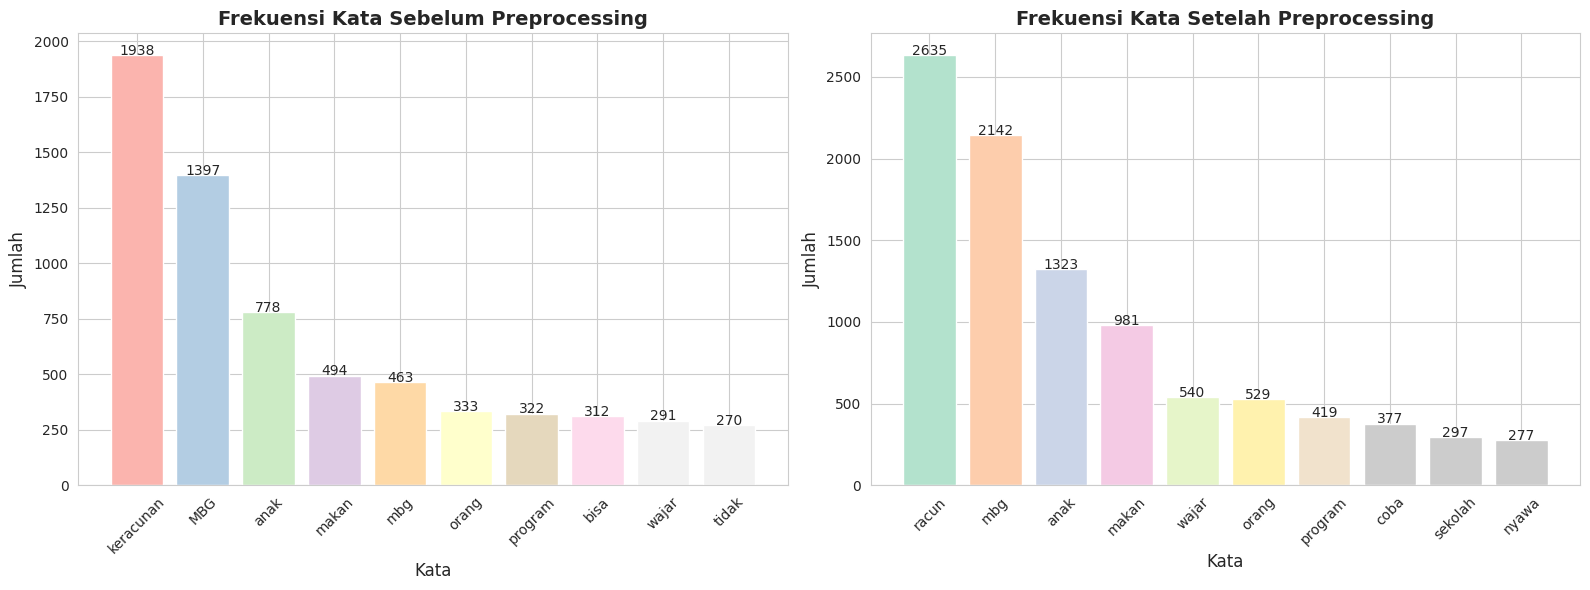

In [170]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import STOPWORDS

# Stopwords yang optimal untuk analisis sentimen MBG
stopwords = set(STOPWORDS)
stopwords.update([
    # Kata hubung & penunjuk (tidak bermakna)
    'yg', 'yang', 'nya', 'di', 'ke', 'dari', 'dan', 'atau',
    'ini', 'itu', 'ada', 'untuk', 'pada', 'dengan', 'juga',

    # Kata keterangan umum (filler)
    'aja', 'sih', 'gak', 'ga', 'ya', 'kayak', 'nih', 'deh',
    'kan', 'kalo', 'kalau', 'jadi', 'buat', 'udah', 'sdh',

    # Kata ganti umum (tidak spesifik)
    'lu', 'gue', 'dia', 'pak', 'bapak', 'kamu', 'kami',

    # Kata filler media sosial
    'fyp', 'cs', 'termul', 'ok', 'gas', 'omon', 'nyinyir', 'sty',

    # Kata teknis tidak relevan
    'https', 'co', 'rt', 'amp', 'update', 'apk', 'ajar',

    # Angka dan simbol
    '1', '2', '3', '...', 'si'
])

# Fungsi helper untuk membersihkan tanda kutip, [ ], , dll
def clean_text_column(series):
    cleaned = []
    for text in series.astype(str):
        # Hapus [ ], tanda petik tunggal/ganda, koma
        text = re.sub(r"[\[\]\'\",]", "", text)
        cleaned.append(text.strip())
    return " ".join(cleaned)

# BEFORE: kolom 'Review Text'
all_text_before = clean_text_column(data["text"])
words_before = all_text_before.split()
filtered_words_before = [word for word in words_before if word.lower() not in stopwords]
word_counts_before = Counter(filtered_words_before)
top_words_before = word_counts_before.most_common(10)
word_before, count_before = zip(*top_words_before)

# AFTER: kolom 'stopword removal'
all_text_after = clean_text_column(data["steming_data"])
words_after = all_text_after.split()
filtered_words_after = [word for word in words_after if word.lower() not in stopwords]
word_counts_after = Counter(filtered_words_after)
top_words_after = word_counts_after.most_common(10)
word_after, count_after = zip(*top_words_after)

# Plot berdampingan
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# BEFORE Plot
colors_before = plt.cm.Pastel1(range(len(word_before)))
bars1 = axes[0].bar(word_before, count_before, color=colors_before)
axes[0].set_title("Frekuensi Kata Sebelum Preprocessing", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Kata", fontsize=12)
axes[0].set_ylabel("Jumlah", fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
for bar, count in zip(bars1, count_before):
    axes[0].text(bar.get_x() + bar.get_width()/2, count + 1, str(count), ha='center')

# AFTER Plot
colors_after = plt.cm.Pastel2(range(len(word_after)))
bars2 = axes[1].bar(word_after, count_after, color=colors_after)
axes[1].set_title("Frekuensi Kata Setelah Preprocessing", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Kata", fontsize=12)
axes[1].set_ylabel("Jumlah", fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
for bar, count in zip(bars2, count_after):
    axes[1].text(bar.get_x() + bar.get_width()/2, count + 1, str(count), ha='center')

plt.tight_layout()
plt.show()

In [171]:
df.to_csv('Hasil_Preprocessing_Data.csv',encoding='utf8', index=False);

# ***PELEBALAN DATA METODE LAXICON BASED***

In [172]:
import pandas as pd

data = pd.read_csv("Hasil_Preprocessing_Data.csv")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3504 entries, 0 to 3503
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   text              3504 non-null   object
 1   cleaning          3504 non-null   object
 2   case_folding      3504 non-null   object
 3   normalisasi       3504 non-null   object
 4   tokenize          3504 non-null   object
 5   stopword removal  3504 non-null   object
 6   steming_data      3504 non-null   object
dtypes: object(7)
memory usage: 191.8+ KB


text  \
0  Seandainya dia ikut keracunan , saya ikut bers...   
1  MBG gak salah pak. Hanya alur dan prosesnya ha...   
2  Bukannya waktu kampanyenya bilang nya bantuan ...   
3  Coba besok yg keracunan jan ethes 🗿 apa bisa l...   
4                           Coba lu yg keracunan deh   

                                            cleaning  \
0  Seandainya dia ikut keracunan  saya ikut bersy...   
1  MBG gak salah pak Hanya alur dan prosesnya har...   
2  Bukannya waktu kampanyenya bilang nya bantuan ...   
3  Coba besok yg keracunan jan ethes  apa bisa lu...   
4                           Coba lu yg keracunan deh   

                                        case_folding  \
0  seandainya dia ikut keracunan  saya ikut bersy...   
1  mbg gak salah pak hanya alur dan prosesnya har...   
2  bukannya waktu kampanyenya bilang nya bantuan ...   
3  coba besok yg keracunan jan ethes  apa bisa lu...   
4                           coba lu yg keracunan deh   

                                         normalisasi  \
0  seandainya dia ikut keracunan saya ikut bersyukur   
1  mbg tidak salah pak hanya alur dan prosesnya h...   
2  bukannya waktu kampanyenya bilang ya bantuan m...   
3  coba besok yang keracunan jangan ethes apa bis...   
4                       coba kamu yang keracunan deh   

                                            tokenize  \
0  ['seandainya', 'dia', 'ikut', 'keracunan', 'sa...   
1  ['mbg', 'tidak', 'salah', 'pak', 'hanya', 'alu...   
2  ['bukannya', 'waktu', 'kampanyenya', 'bilang',...   
3  ['coba', 'besok', 'yang', 'keracunan', 'jangan...   
4       ['coba', 'kamu', 'yang', 'keracunan', 'deh']   

                                    stopword removal  \
0                     seandainya keracunan bersyukur   
1  mbg salah alur prosesnya diperbaiki dapur mbg ...   
2       kampanyenya bilang ya bantuan mbg dana china   
3               coba besok keracunan ethes mengomong   
4                                 coba keracunan deh   

                                        steming_data  
0                                  anda racun syukur  
1  mbg salah alur proses baik dapur mbg layan rib...  
2            kampanye bilang ya bantu mbg dana china  
3                       coba besok racun ethes omong  
4                                     coba racun deh

In [173]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3504 entries, 0 to 3503
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   text              3504 non-null   object
 1   cleaning          3504 non-null   object
 2   case_folding      3504 non-null   object
 3   normalisasi       3504 non-null   object
 4   tokenize          3504 non-null   object
 5   stopword removal  3504 non-null   object
 6   steming_data      3504 non-null   object
dtypes: object(7)
memory usage: 191.8+ KB


In [174]:
data = pd.DataFrame(data[['steming_data']])
data.head(5)

steming_data
0                                  anda racun syukur
1  mbg salah alur proses baik dapur mbg layan rib...
2            kampanye bilang ya bantu mbg dana china
3                       coba besok racun ethes omong
4                                     coba racun deh

In [175]:
import pandas as pd

# Load data
lexicon = pd.read_csv('lexicon_mbg_sentiment.csv')

# Hapus duplikasi di awal (SEBELUM analisis sentimen)
print(f"Data awal: {len(data)} baris")
data = data.drop_duplicates(subset=['steming_data'])
data.reset_index(drop=True, inplace=True)
print(f"Setelah hapus duplikasi: {len(data)} baris")

# Inisialisasi lexicon dari file utama
positive_lexicon = set(lexicon[lexicon['kategori'].str.lower() == 'positif']['kata'].str.lower().tolist())
negative_lexicon = set(lexicon[lexicon['kategori'].str.lower() == 'negatif']['kata'].str.lower().tolist())
neutral_lexicon  = set(lexicon[lexicon['kategori'].str.lower() == 'netral']['kata'].str.lower().tolist())

# Tambahkan lexicon domain MBG (Makan Bergizi Gratis)
positive_mbg = {'sehat', 'bergizi', 'baik', 'bersih', 'bantu', 'gratis', 'bermanfaat', 'puas', 'bagus'}
negative_mbg = {'keracunan', 'sakit', 'buruk', 'bau', 'busuk', 'basi', 'jorok', 'gagal', 'kecewa'}
neutral_mbg  = {'program', 'makan', 'menu', 'anak', 'sekolah', 'pemerintah', 'siang', 'hari', 'gizi'}

# Gabungkan lexicon utama + tambahan MBG
positive_lexicon.update(positive_mbg)
negative_lexicon.update(negative_mbg)
neutral_lexicon.update(neutral_mbg)

# Fungsi sentimen
def determine_sentiment(text):
    if isinstance(text, str):
        text_lower = text.lower()
        positive_count = sum(1 for word in text_lower.split() if word in positive_lexicon)
        negative_count = sum(1 for word in text_lower.split() if word in negative_lexicon)
        sentiment_score = positive_count - negative_count

        if sentiment_score > 0:
            return sentiment_score, "Positif"
        elif sentiment_score < 0:
            return sentiment_score, "Negatif"
        else:
            return 0, "Netral"
    return 0, "Netral"

# Analisis sentimen
data[['Score', 'Sentiment']] = data['steming_data'].apply(lambda x: pd.Series(determine_sentiment(x)))

# Lihat distribusi
print("\nDistribusi Sentimen:")
print(data['Sentiment'].value_counts())
print(f"\nTotal data unik: {len(data)}")

data.head(20)


Data awal: 3504 baris
Setelah hapus duplikasi: 3416 baris

Distribusi Sentimen:
Sentiment
Negatif    2140
Netral      996
Positif     280
Name: count, dtype: int64

Total data unik: 3416


steming_data  Score Sentiment
0                                   anda racun syukur      0    Netral
1   mbg salah alur proses baik dapur mbg layan rib...      0    Netral
2             kampanye bilang ya bantu mbg dana china      1   Positif
3                        coba besok racun ethes omong     -1   Negatif
4                                      coba racun deh     -1   Negatif
5   negara wajib lindung anak mayoritas ribu anak ...      0    Netral
6   takut doa orangtua khawatir anak makan mbg ama...      0    Netral
7        habis gampar pakai ompreng otak goyang kacau     -1   Negatif
8   ajar masak racun mbg siswa amp siswi masak bah...     -1   Negatif
9   iya siswa siswi kelaperan sekolah biaya mbg al...      0    Netral
10          racun mbg usut program mbg nyundul langit     -1   Negatif
11  siswa negeri kota salatiga masuk sekolah senin...      0    Netral
12                        senin moga berita racun mbg     -1   Negatif
13  tekan kolaborasi lintas lembaga laksana mbg ti...     -1   Negatif
14  tuju ya mbg ya masyarakat sehat nyata ya mbg l...      0    Netral
15  prabowo bacot doang gede kerja becus anak racu...     -1   Negatif
16  ya dana mbg pakai bangun kantin hire tukang ma...      0    Netral
17  standar sppg polri zero racun teladan nasional...      1   Positif
18  kemenkes buka hotline adun masyarakat lapor al...      0    Netral
19  anak sekolah mbg cerdas statemen kepala bgn ra...      0    Netral

/tmp/ipython-input-1910355637.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


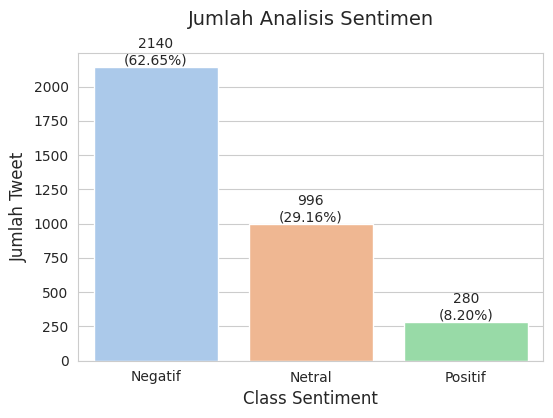

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = data['Sentiment'].value_counts()
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analisis Sentimen', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

total = len(data['Sentiment'])

for i, count in enumerate(sentiment_count.values):
    percentage = f'{100 * count / total:.2f}%'
    ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom')

plt.show()

In [177]:
data.to_csv('Hasil_Labelling_Data.csv',encoding='utf8', index=False)

# ***WORDCLOUD***



In [178]:
import pandas as pd

data = pd.read_csv("Hasil_Labelling_Data.csv")
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3416 entries, 0 to 3415
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   steming_data  3416 non-null   object
 1   Score         3416 non-null   int64 
 2   Sentiment     3416 non-null   object
dtypes: int64(1), object(2)
memory usage: 80.2+ KB


steming_data  Score Sentiment
0                                  anda racun syukur      0    Netral
1  mbg salah alur proses baik dapur mbg layan rib...      0    Netral
2            kampanye bilang ya bantu mbg dana china      1   Positif
3                       coba besok racun ethes omong     -1   Negatif
4                                     coba racun deh     -1   Negatif

In [179]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3416 entries, 0 to 3415
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   steming_data  3416 non-null   object
 1   Score         3416 non-null   int64 
 2   Sentiment     3416 non-null   object
dtypes: int64(1), object(2)
memory usage: 80.2+ KB


In [180]:
data = pd.DataFrame(data[['steming_data','Sentiment']])
data.head(5)

steming_data Sentiment
0                                  anda racun syukur    Netral
1  mbg salah alur proses baik dapur mbg layan rib...    Netral
2            kampanye bilang ya bantu mbg dana china   Positif
3                       coba besok racun ethes omong   Negatif
4                                     coba racun deh   Negatif

In [181]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Pisahkan dataset berdasarkan sentimen
sentimen_Negative = data[data['Sentiment'] == 'Negatif']['steming_data'].str.cat(sep=' ')
sentimen_Netral = data[data['Sentiment'] == 'Netral']['steming_data'].str.cat(sep=' ')
sentimen_Positive = data[data['Sentiment'] == 'Positif']['steming_data'].str.cat(sep=' ')

# Stopwords yang optimal untuk analisis sentimen MBG
stopwords = set(STOPWORDS)
stopwords.update([
    # Kata hubung & penunjuk (tidak bermakna)
    'yg', 'yang', 'nya', 'di', 'ke', 'dari', 'dan', 'atau',
    'ini', 'itu', 'ada', 'untuk', 'pada', 'dengan', 'juga',

    # Kata keterangan umum (filler)
    'aja', 'sih', 'gak', 'ga', 'ya', 'kayak', 'nih', 'deh',
    'kan', 'kalo', 'kalau', 'jadi', 'buat', 'udah', 'sdh',

    # Kata ganti umum (tidak spesifik)
    'lu', 'gue', 'dia', 'pak', 'bapak', 'kamu', 'kami',

    # Kata filler media sosial
    'fyp', 'cs', 'termul', 'ok', 'gas', 'omon', 'nyinyir', 'sty',

    # Kata teknis tidak relevan
    'https', 'co', 'rt', 'amp', 'update', 'apk', 'ajar',

    # Angka dan simbol
    '1', '2', '3', '...', 'si'
])

# Buat wordcloud untuk masing-masing sentimen
wordcloud_negative = WordCloud(width=800, height=400, background_color='black', colormap='Reds', stopwords=stopwords).generate(sentimen_Negative)
wordcloud_netral = WordCloud(width=800, height=400, background_color='black', colormap='Blues', stopwords=stopwords).generate(sentimen_Negative)
wordcloud_positive = WordCloud(width=800, height=400, background_color='white', colormap='Greens', stopwords=stopwords).generate(sentimen_Positive)

# Fungsi untuk membuat dan menampilkan WordCloud
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=100, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()


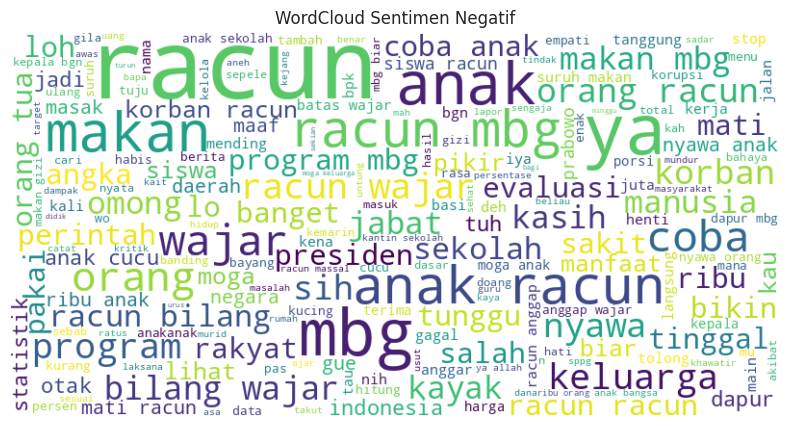

✓ Gambar tersimpan: wordcloud_negative_mbg.png


<Figure size 640x480 with 0 Axes>

In [182]:
# Membuat WordCloud untuk sentimen Negatif
create_wordcloud(sentimen_Negative, 'WordCloud Sentimen Negatif')
filename = 'wordcloud_negative_mbg.png'
plt.savefig(filename, dpi=300, bbox_inches='tight')
print(f"✓ Gambar tersimpan: {filename}")

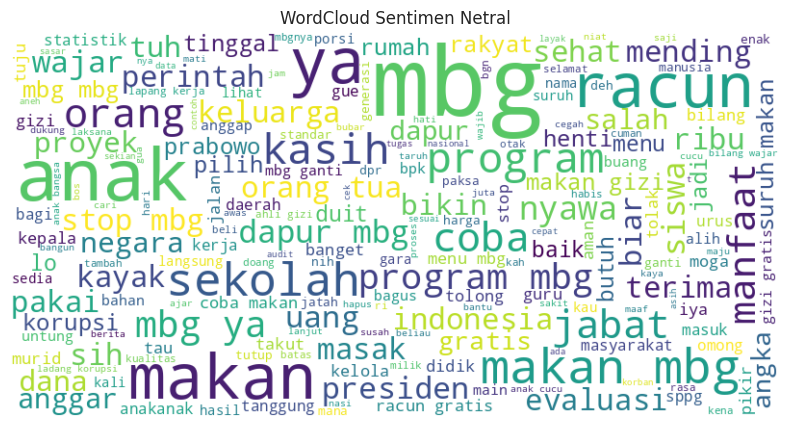

✓ Gambar tersimpan: wordcloud_netral_mbg.png


<Figure size 640x480 with 0 Axes>

In [183]:
# Membuat WordCloud untuk sentimen Netral
create_wordcloud(sentimen_Netral, 'WordCloud Sentimen Netral')
filename = 'wordcloud_netral_mbg.png'
plt.savefig(filename, dpi=300, bbox_inches='tight')
print(f"✓ Gambar tersimpan: {filename}")

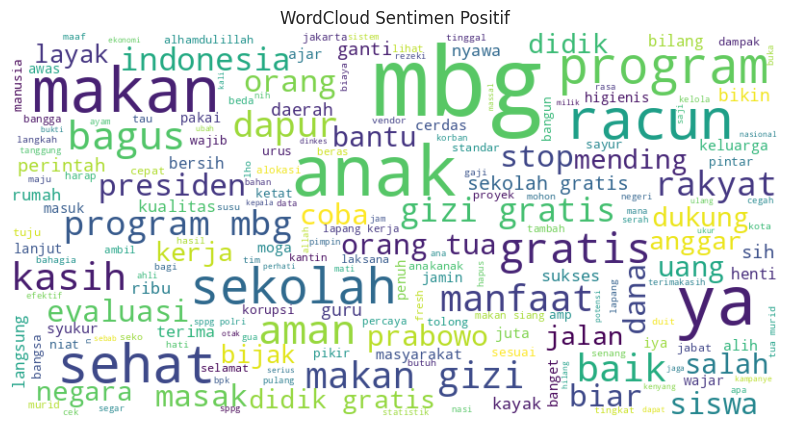

✓ Gambar tersimpan: wordcloud_positive_mbg.png


<Figure size 640x480 with 0 Axes>

In [184]:
# Membuat WordCloud untuk sentimen Positif
create_wordcloud(sentimen_Positive, 'WordCloud Sentimen Positif')
filename = 'wordcloud_positive_mbg.png'
plt.savefig(filename, dpi=300, bbox_inches='tight')
print(f"✓ Gambar tersimpan: {filename}")

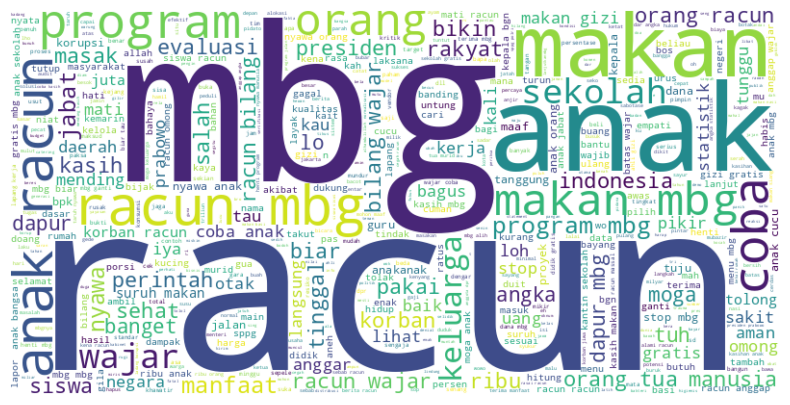

In [185]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Mengisi nilai NaN dengan string kosong ('')
data['steming_data'] = data['steming_data'].fillna('')

# Menggabungkan teks dari kolom
text = ' '.join(data['steming_data'].astype(str).tolist())

# Stopwords yang optimal untuk analisis sentimen MBG
stopwords = set(STOPWORDS)
stopwords.update([
    # Kata hubung & penunjuk (tidak bermakna)
    'yg', 'yang', 'nya', 'di', 'ke', 'dari', 'dan', 'atau',
    'ini', 'itu', 'ada', 'untuk', 'pada', 'dengan', 'juga',

    # Kata keterangan umum (filler)
    'aja', 'sih', 'gak', 'ga', 'ya', 'kayak', 'nih', 'deh',
    'kan', 'kalo', 'kalau', 'jadi', 'buat', 'udah', 'sdh',

    # Kata ganti umum (tidak spesifik)
    'lu', 'gue', 'dia', 'pak', 'bapak', 'kamu', 'kami',

    # Kata filler media sosial
    'fyp', 'cs', 'termul', 'ok', 'gas', 'omon', 'nyinyir', 'sty',

    # Kata teknis tidak relevan
    'https', 'co', 'rt', 'amp', 'update', 'apk', 'ajar',

    # Angka dan simbol
    '1', '2', '3', '...', 'si'
])

wc = WordCloud(stopwords=stopwords, background_color="white", max_words=1000, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# ***FREKUENSI KATA***



In [186]:
import pandas as pd

data = pd.read_csv("Hasil_Labelling_Data.csv")
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3416 entries, 0 to 3415
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   steming_data  3416 non-null   object
 1   Score         3416 non-null   int64 
 2   Sentiment     3416 non-null   object
dtypes: int64(1), object(2)
memory usage: 80.2+ KB


steming_data  Score Sentiment
0                                  anda racun syukur      0    Netral
1  mbg salah alur proses baik dapur mbg layan rib...      0    Netral
2            kampanye bilang ya bantu mbg dana china      1   Positif
3                       coba besok racun ethes omong     -1   Negatif
4                                     coba racun deh     -1   Negatif

In [187]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3416 entries, 0 to 3415
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   steming_data  3416 non-null   object
 1   Score         3416 non-null   int64 
 2   Sentiment     3416 non-null   object
dtypes: int64(1), object(2)
memory usage: 80.2+ KB


In [188]:
data = pd.DataFrame(data[['steming_data','Sentiment']])
data.head(5)

steming_data Sentiment
0                                  anda racun syukur    Netral
1  mbg salah alur proses baik dapur mbg layan rib...    Netral
2            kampanye bilang ya bantu mbg dana china   Positif
3                       coba besok racun ethes omong   Negatif
4                                     coba racun deh   Negatif

In [189]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter

# Pisahkan dataset berdasarkan sentimen
sentimen_Negative = data[data['Sentiment'] == 'Negatif']['steming_data'].str.cat(sep=' ')
sentimen_Netral = data[data['Sentiment'] == 'Netral']['steming_data'].str.cat(sep=' ')
sentimen_Positive = data[data['Sentiment'] == 'Positif']['steming_data'].str.cat(sep=' ')

# Stopwords yang optimal untuk analisis sentimen MBG
stopwords = set(STOPWORDS)
stopwords.update([
    # Kata hubung & penunjuk (tidak bermakna)
    'yg', 'yang', 'nya', 'di', 'ke', 'dari', 'dan', 'atau',
    'ini', 'itu', 'ada', 'untuk', 'pada', 'dengan', 'juga',

    # Kata keterangan umum (filler)
    'aja', 'sih', 'gak', 'ga', 'ya', 'kayak', 'nih', 'deh',
    'kan', 'kalo', 'kalau', 'jadi', 'buat', 'udah', 'sdh',

    # Kata ganti umum (tidak spesifik)
    'lu', 'gue', 'dia', 'pak', 'bapak', 'kamu', 'kami',

    # Kata filler media sosial
    'fyp', 'cs', 'termul', 'ok', 'gas', 'omon', 'nyinyir', 'sty',

    # Kata teknis tidak relevan
    'https', 'co', 'rt', 'amp', 'update', 'apk', 'ajar',

    # Angka dan simbol
    '1', '2', '3', '...', 'si'
])

# Fungsi hitung frekuensi kata + tampilkan jumlah
def plot_word_freq(text, title, color):
    words = [w for w in text.split() if w not in stopwords]
    word_freq = Counter(words).most_common(10)  # ambil 10 kata teratas
    df_freq = pd.DataFrame(word_freq, columns=['Kata', 'Frekuensi'])

    plt.figure(figsize=(8,5))
    bars = plt.barh(df_freq['Kata'], df_freq['Frekuensi'], color=color)
    plt.gca().invert_yaxis()  # biar kata frekuensi tertinggi di atas
    plt.title(f"Top 10 Kata - Sentimen {title}", fontsize=14)
    plt.xlabel("Frekuensi")
    plt.ylabel("Kata")

    # Tambahkan label jumlah di ujung bar
    for bar in bars:
        plt.text(
            bar.get_width() + 0.2,  # posisi X sedikit ke kanan
            bar.get_y() + bar.get_height()/2,  # posisi Y di tengah bar
            str(int(bar.get_width())),  # nilai frekuensi
            va='center'
        )

    plt.show()

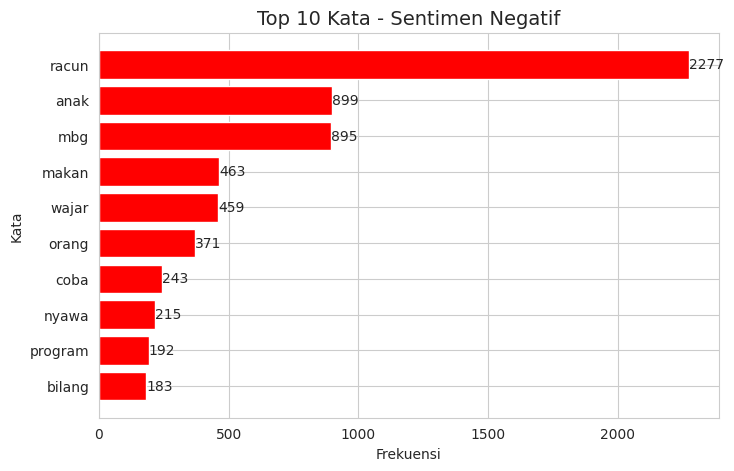

In [190]:
plot_word_freq(sentimen_Negative, "Negatif", "red")

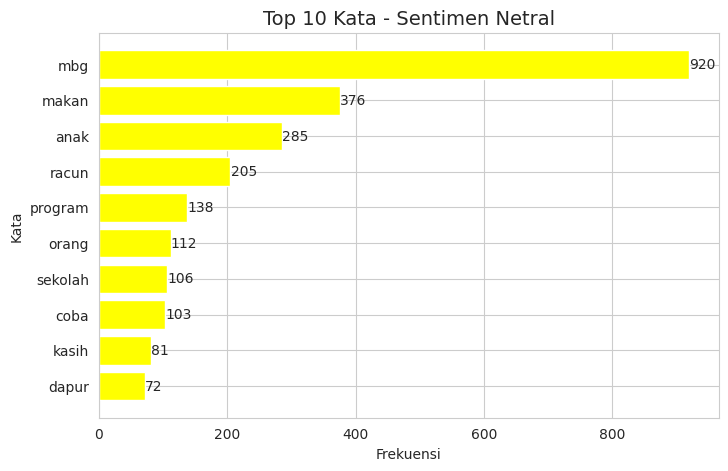

In [191]:
plot_word_freq(sentimen_Netral, "Netral", "yellow")

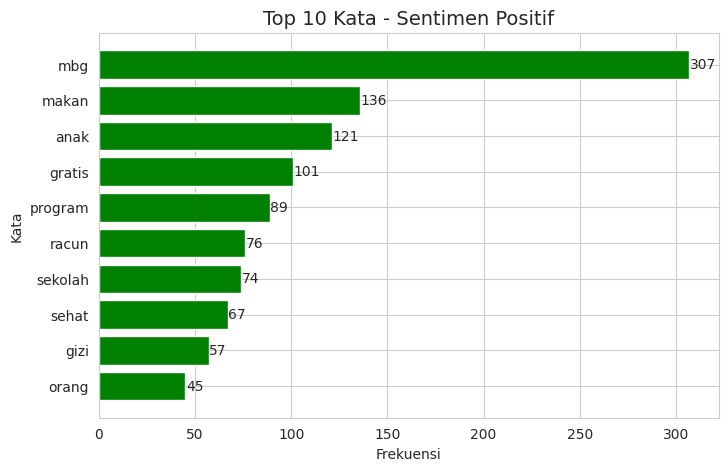

In [192]:
plot_word_freq(sentimen_Positive, "Positif", "green")

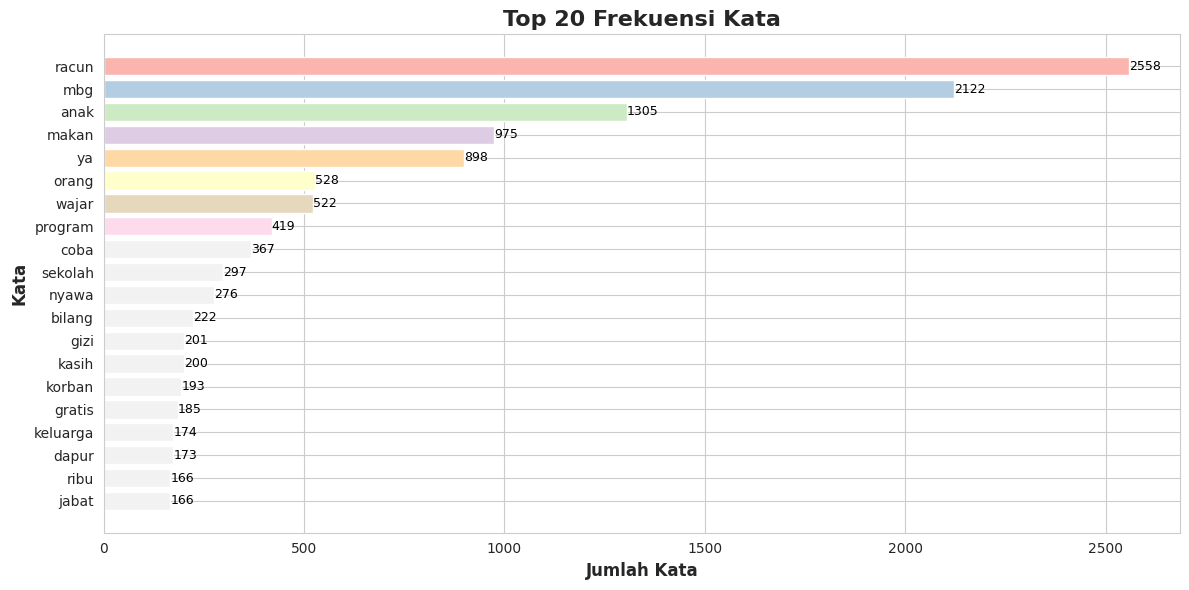

In [193]:
import matplotlib.pyplot as plt
from collections import Counter

# Gabungkan semua teks
text = " ".join(data["steming_data"])

tokens = text.split()
word_counts = Counter(tokens)

# Ambil 20 kata teratas
top_words = word_counts.most_common(20)
word, count = zip(*top_words)

# Palet warna soft (Pastel)
colors = plt.cm.Pastel1(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.barh(word, count, color=colors)
plt.xlabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.ylabel("Kata", fontsize=12, fontweight='bold')
plt.title("Top 20 Frekuensi Kata", fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()  # Biar frekuensi tertinggi di atas

# Tambahkan angka di ujung bar
for bar, num in zip(bars, count):
    plt.text(num + 0.5, bar.get_y() + bar.get_height()/2,
             str(num), va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()


# ***N-Gram Frekuensi Kata***



In [194]:
import pandas as pd

data = pd.read_csv("Hasil_Labelling_Data.csv")
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3416 entries, 0 to 3415
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   steming_data  3416 non-null   object
 1   Score         3416 non-null   int64 
 2   Sentiment     3416 non-null   object
dtypes: int64(1), object(2)
memory usage: 80.2+ KB


steming_data  Score Sentiment
0                                  anda racun syukur      0    Netral
1  mbg salah alur proses baik dapur mbg layan rib...      0    Netral
2            kampanye bilang ya bantu mbg dana china      1   Positif
3                       coba besok racun ethes omong     -1   Negatif
4                                     coba racun deh     -1   Negatif

In [195]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3416 entries, 0 to 3415
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   steming_data  3416 non-null   object
 1   Score         3416 non-null   int64 
 2   Sentiment     3416 non-null   object
dtypes: int64(1), object(2)
memory usage: 80.2+ KB


In [196]:
data = pd.DataFrame(data[['steming_data','Sentiment']])
data.head(5)

steming_data Sentiment
0                                  anda racun syukur    Netral
1  mbg salah alur proses baik dapur mbg layan rib...    Netral
2            kampanye bilang ya bantu mbg dana china   Positif
3                       coba besok racun ethes omong   Negatif
4                                     coba racun deh   Negatif

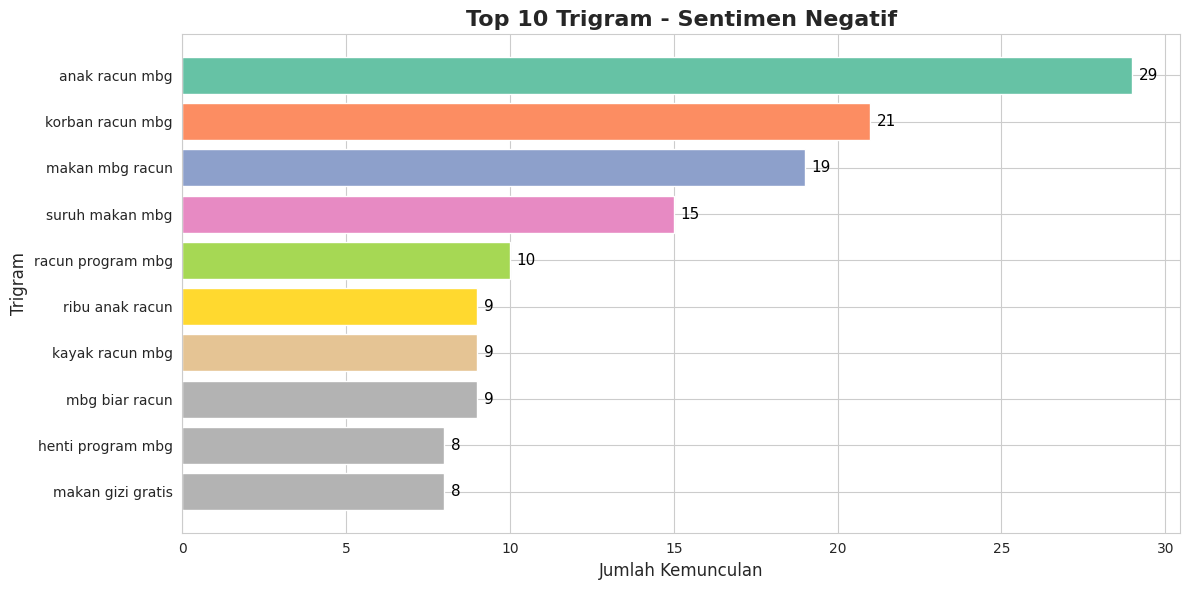

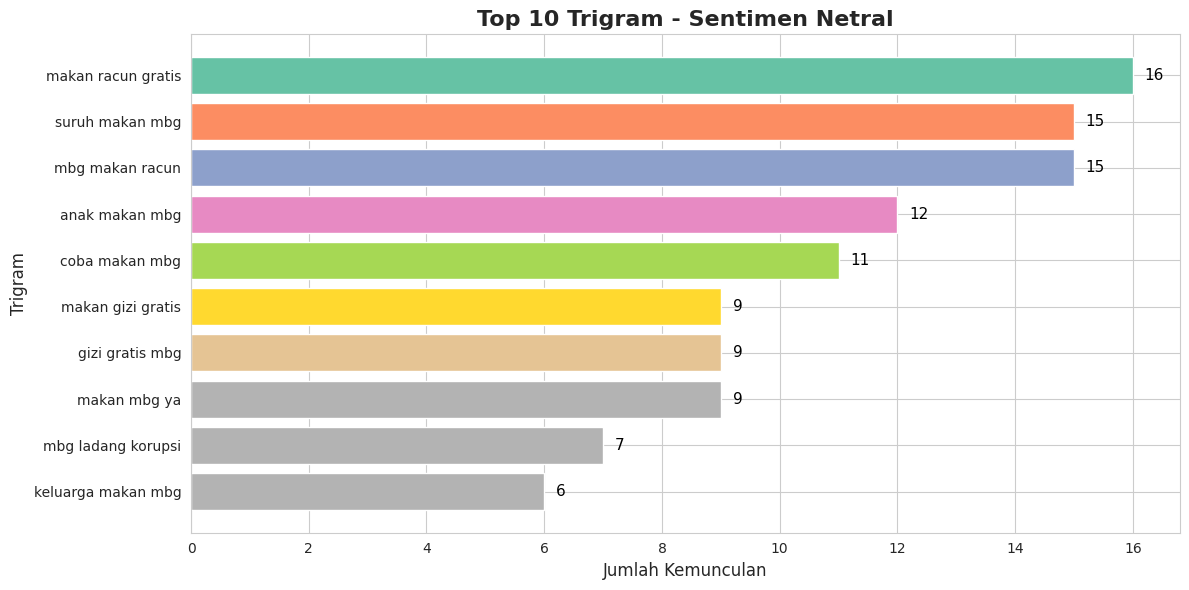

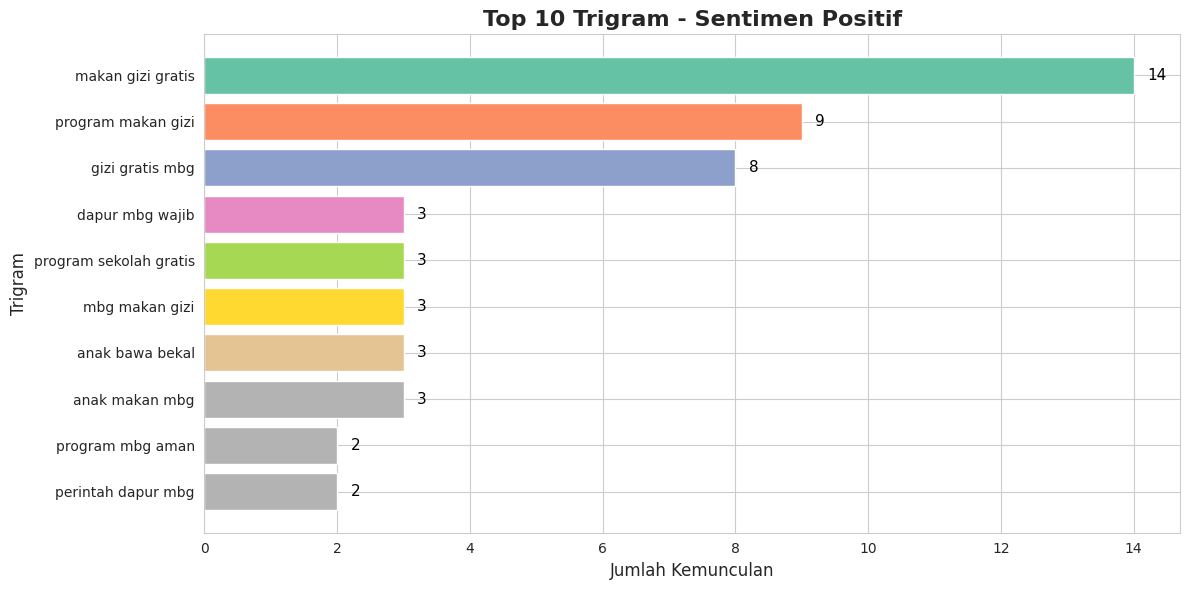

In [197]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Stopwords sebagai LIST (bukan set!)
stopwords_minimal = [
    # Kata hubung tidak bermakna
    'yg', 'yang', 'nya', 'di', 'ke', 'dari', 'dan', 'atau',
    'ini', 'itu', 'ada', 'untuk', 'pada', 'dengan', 'juga',

    # Filler media sosial
    'aja', 'sih', 'kan', 'deh', 'nih',
    'fyp', 'rt', 'amp', 'https', 'co',

    # Kata tidak relevan domain MBG
    'hotline', 'aduan', 'jateng', 'pemprov', 'buka'
]

# JANGAN hapus: 'tidak', 'gak', 'bukan', 'sangat', 'banget' - penting untuk sentiment!

# Fungsi get n-gram dengan TRIGRAM (n=3)
def get_top_ngrams(corpus, n=3, top_k=10, stopwords=None):
    vec = CountVectorizer(
        ngram_range=(n, n),
        stop_words=stopwords,  # Harus list atau None
        max_features=100
    ).fit(corpus)

    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

    # Filter: hanya ambil n-gram yang mengandung keyword MBG
    keywords_mbg = ['mbg', 'keracunan', 'korban', 'makan', 'bergizi',
                    'gratis', 'dapur', 'sakit', 'meninggal', 'anak']

    words_freq_filtered = [
        (word, count) for word, count in words_freq
        if any(keyword in word for keyword in keywords_mbg)
    ]

    words_freq_filtered = sorted(words_freq_filtered, key=lambda x: x[1], reverse=True)
    return words_freq_filtered[:top_k]

# Plot dengan filter
def plot_ngrams(corpus, sentiment_label, color_map=plt.cm.Set2, stopwords=None):
    top_ngrams = get_top_ngrams(corpus, n=3, top_k=10, stopwords=stopwords)

    if not top_ngrams:
        print(f"Tidak ada trigram untuk sentimen {sentiment_label}")
        return

    ngrams, counts = zip(*top_ngrams)
    colors = color_map(range(len(ngrams)))

    plt.figure(figsize=(12, 6))
    bars = plt.barh(ngrams, counts, color=colors)
    plt.gca().invert_yaxis()
    plt.title(f"Top 10 Trigram - Sentimen {sentiment_label}",
              fontsize=16, fontweight='bold')
    plt.xlabel("Jumlah Kemunculan", fontsize=12)
    plt.ylabel("Trigram", fontsize=12)

    for bar, num in zip(bars, counts):
        plt.text(num + 0.2, bar.get_y() + bar.get_height()/2,
                 str(int(num)), va='center', fontsize=11, color='black')

    plt.tight_layout()
    plt.show()

# Filter data SEBELUM analisis
def filter_mbg_relevant(text):
    keywords = ['mbg', 'keracunan', 'korban', 'makan bergizi gratis',
                'dapur', 'makanan gratis']
    text_lower = str(text).lower()
    return any(keyword in text_lower for keyword in keywords)

# Terapkan filter
data_filtered = data[data['steming_data'].apply(filter_mbg_relevant)]

# Ambil corpus yang sudah difilter
corpus_neg = data_filtered[data_filtered['Sentiment'] == 'Negatif']['steming_data'].astype(str).tolist()
corpus_net = data_filtered[data_filtered['Sentiment'] == 'Netral']['steming_data'].astype(str).tolist()
corpus_pos = data_filtered[data_filtered['Sentiment'] == 'Positif']['steming_data'].astype(str).tolist()

# Plot dengan stopwords minimal (sebagai list)
plot_ngrams(corpus_neg, 'Negatif', stopwords=stopwords_minimal)
plot_ngrams(corpus_net, 'Netral', stopwords=stopwords_minimal)
plot_ngrams(corpus_pos, 'Positif', stopwords=stopwords_minimal)


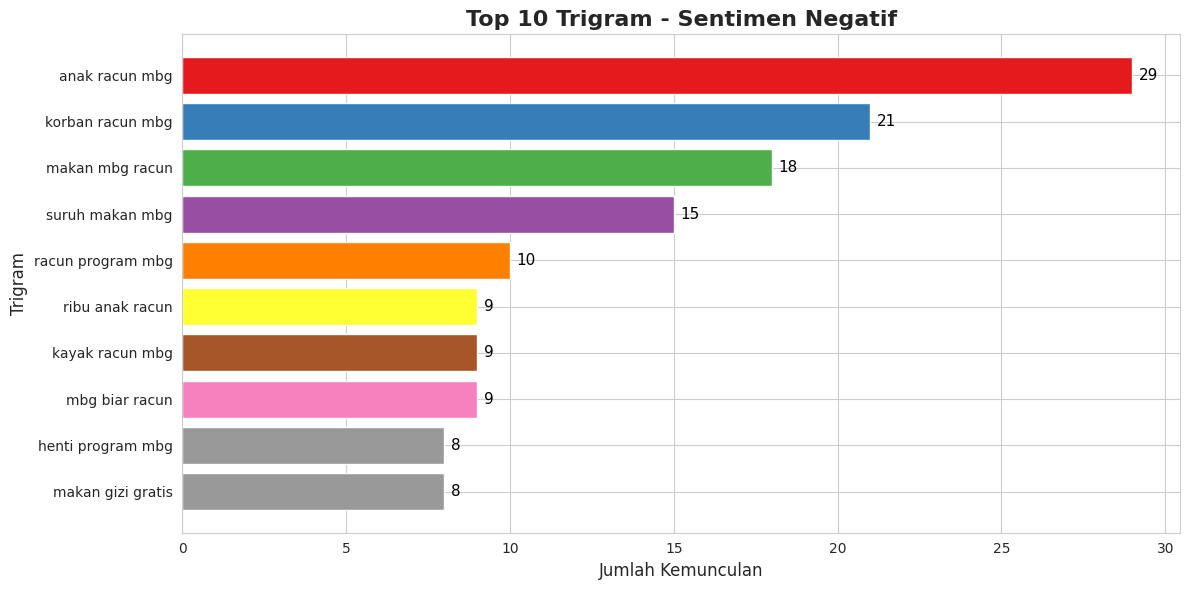

✓ Gambar tersimpan: trigram10_negative_mbg.png


<Figure size 640x480 with 0 Axes>

In [198]:
plot_ngrams(corpus_neg, "Negatif", plt.cm.Set1)
filename = 'trigram10_negative_mbg.png'
plt.savefig(filename, dpi=300, bbox_inches='tight')
print(f"✓ Gambar tersimpan: {filename}")

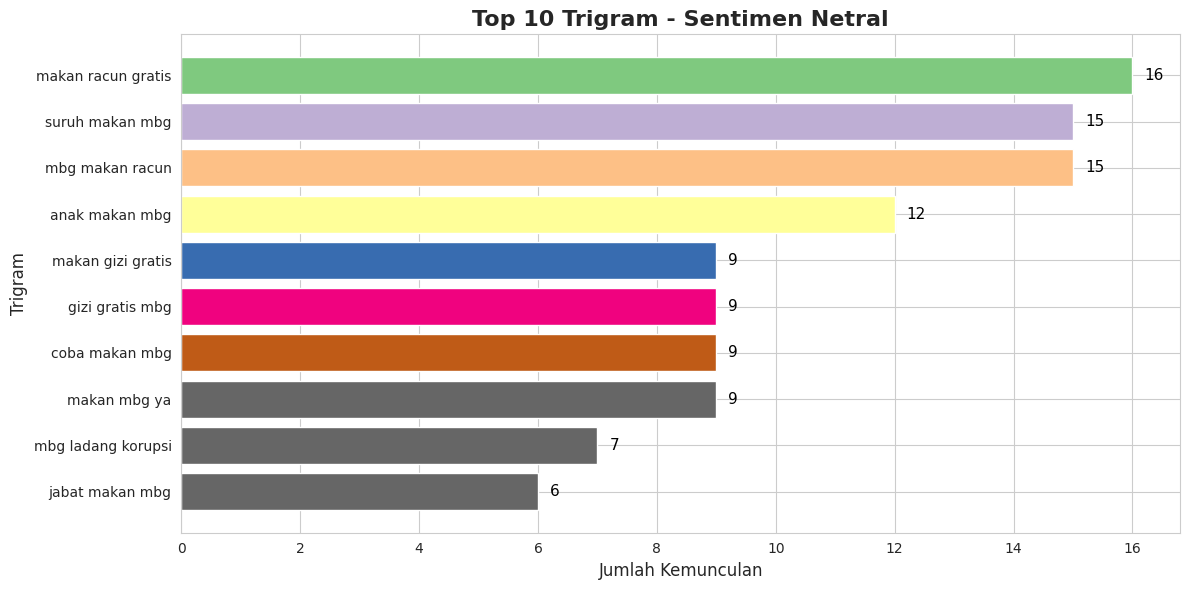

✓ Gambar tersimpan: trigram10_netral_mbg.png


<Figure size 640x480 with 0 Axes>

In [199]:
plot_ngrams(corpus_net, "Netral", plt.cm.Accent)
filename = 'trigram10_netral_mbg.png'
plt.savefig(filename, dpi=300, bbox_inches='tight')
print(f"✓ Gambar tersimpan: {filename}")

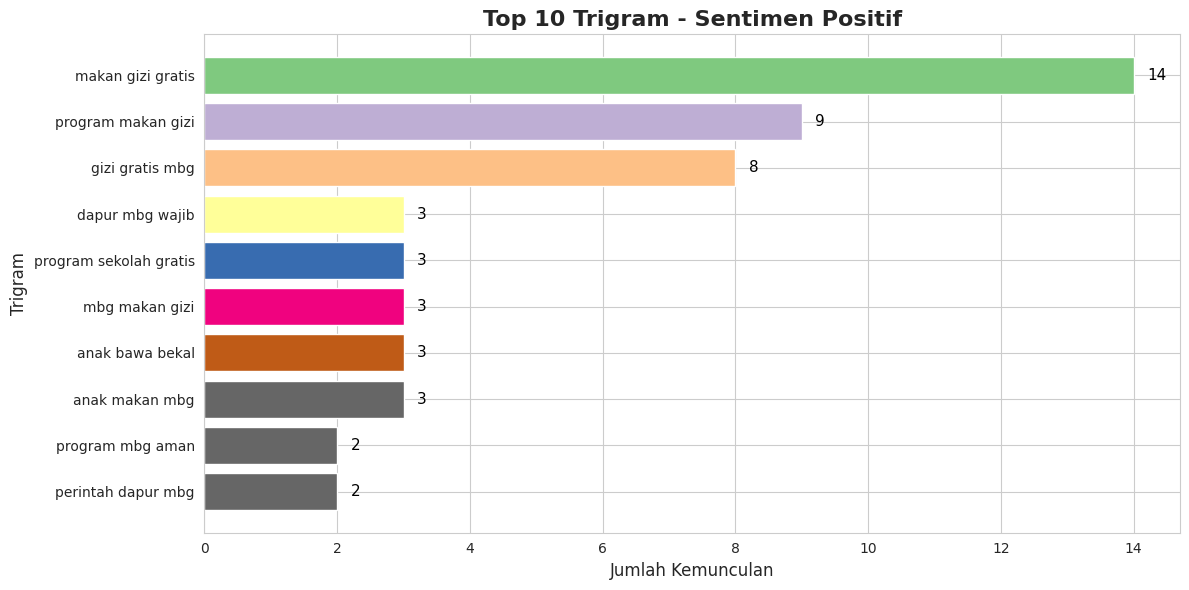

✓ Gambar tersimpan: trigram10_positif_mbg.png


<Figure size 640x480 with 0 Axes>

In [200]:
plot_ngrams(corpus_pos, "Positif", plt.cm.Accent)
filename = 'trigram10_positif_mbg.png'
plt.savefig(filename, dpi=300, bbox_inches='tight')
print(f"✓ Gambar tersimpan: {filename}")

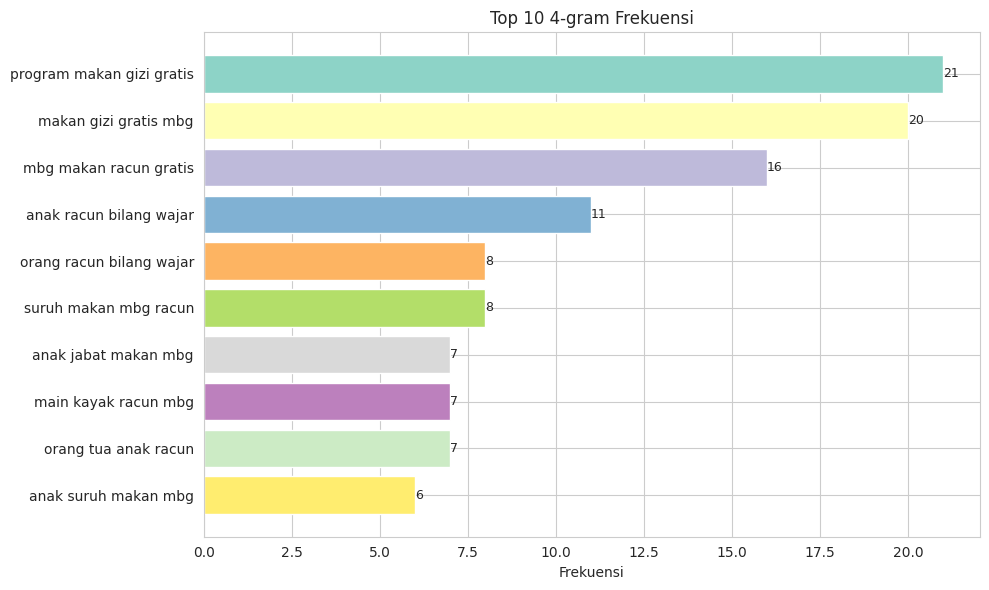

✓ Gambar tersimpan: top10_4gram_mbg.png


<Figure size 640x480 with 0 Axes>

In [201]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Fungsi untuk membuat diagram batang frekuensi n-gram
def plot_ngram_frequencies(texts, ngram_range=(4,4), top_n=10, cmap=plt.cm.Set3):
    # Jangan pakai stop_words di parameter
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    X = vectorizer.fit_transform(texts)

    # Hitung total frekuensi setiap n-gram
    ngram_counts = X.sum(axis=0).A1
    ngram_vocab = vectorizer.get_feature_names_out()
    freq_dist = dict(zip(ngram_vocab, ngram_counts))

    # Ambil n-gram dengan frekuensi tertinggi
    top_ngrams = Counter(freq_dist).most_common(top_n)
    labels, values = zip(*top_ngrams)

    # Buat warna berbeda untuk tiap bar
    colors = cmap(np.linspace(0, 1, len(labels)))

    # Visualisasi
    plt.figure(figsize=(10, 6))
    bars = plt.barh(labels[::-1], values[::-1], color=colors[::-1])
    plt.title(f'Top {top_n} {ngram_range[0]}-gram Frekuensi')
    plt.xlabel('Frekuensi')

    # Tambahkan label angka di ujung bar
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, f'{int(width)}', va='center', ha='left', fontsize=9)

    plt.tight_layout()
    plt.show()

# Contoh pemanggilan: Visualisasi 4-gram
plot_ngram_frequencies(data['steming_data'], ngram_range=(4,4), top_n=10, cmap=plt.cm.Set3)
filename = 'top10_4gram_mbg.png'
plt.savefig(filename, dpi=300, bbox_inches='tight')
print(f"✓ Gambar tersimpan: {filename}")


# ***PENERAPAN MODEL LSTM (Embedding)***

In [202]:
import pandas as pd

# Load the dataset
file_path = 'Hasil_Labelling_Data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

steming_data  Score Sentiment
0                                  anda racun syukur      0    Netral
1  mbg salah alur proses baik dapur mbg layan rib...      0    Netral
2            kampanye bilang ya bantu mbg dana china      1   Positif
3                       coba besok racun ethes omong     -1   Negatif
4                                     coba racun deh     -1   Negatif

In [203]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Extracting relevant columns
texts = data['steming_data'].astype(str).values
labels = data['Sentiment'].values

# Encoding labels into numeric values
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

In [204]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(texts, encoded_labels, test_size=0.2, random_state=42)

print(f"Training data size: {len(X_train)}")
print(f"Testing data size: {len(X_test)}")

Training data size: 2732
Testing data size: 684


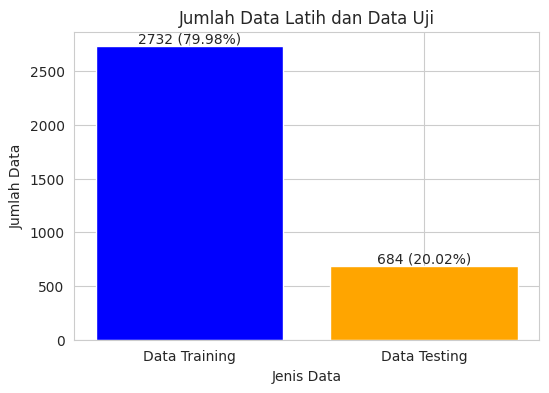

In [205]:
# Encode labels
le = LabelEncoder()
Y = encoded_labels
Y = le.fit_transform(Y)
X = texts


train_size = len(X_train)
test_size = len(X_test)

plt.figure(figsize=(6, 4))
bars = plt.bar(['Data Training', 'Data Testing'], [train_size, test_size], color=['blue', 'orange'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height} ({height / (train_size + test_size) * 100:.2f}%)',
             ha='center', va='bottom')

plt.title('Jumlah Data Latih dan Data Uji')
plt.xlabel('Jenis Data')
plt.ylabel('Jumlah Data')
plt.show()

In [206]:
!pip install tensorflow

# Tokenization
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding
max_len = 100
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

# Vocabulary size
vocab_size = len(tokenizer.word_index) + 1

# Model Building
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(6, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [208]:
# Train the model
history = model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_data=(X_test_padded, y_test))

# Evaluate the model
y_pred = model.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)

Epoch 1/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 28s 320ms/step - accuracy: 0.9109 - loss: 0.2337 - val_accuracy: 0.8977 - val_loss: 0.3171
Epoch 2/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 210ms/step - accuracy: 0.9620 - loss: 0.1198 - val_accuracy: 0.8962 - val_loss: 0.3464
Epoch 3/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 222ms/step - accuracy: 0.9713 - loss: 0.0969 - val_accuracy: 0.8933 - val_loss: 0.3805
Epoch 4/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 205ms/step - accuracy: 0.9905 - loss: 0.0390 - val_accuracy: 0.8596 - val_loss: 0.6966
Epoch 5/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 222ms/step - accuracy: 0.9922 - loss: 0.0368 - val_accuracy: 0.8743 - val_loss: 0.6283
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


In [209]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print()


# Classification Report
report = classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_)
print(report)

Accuracy: 0.8742690058479532
Accuracy: 87.43%

              precision    recall  f1-score   support

     Negatif       0.92      0.97      0.94       451
      Netral       0.74      0.80      0.77       176
     Positif       1.00      0.37      0.54        57

    accuracy                           0.87       684
   macro avg       0.89      0.71      0.75       684
weighted avg       0.88      0.87      0.87       684



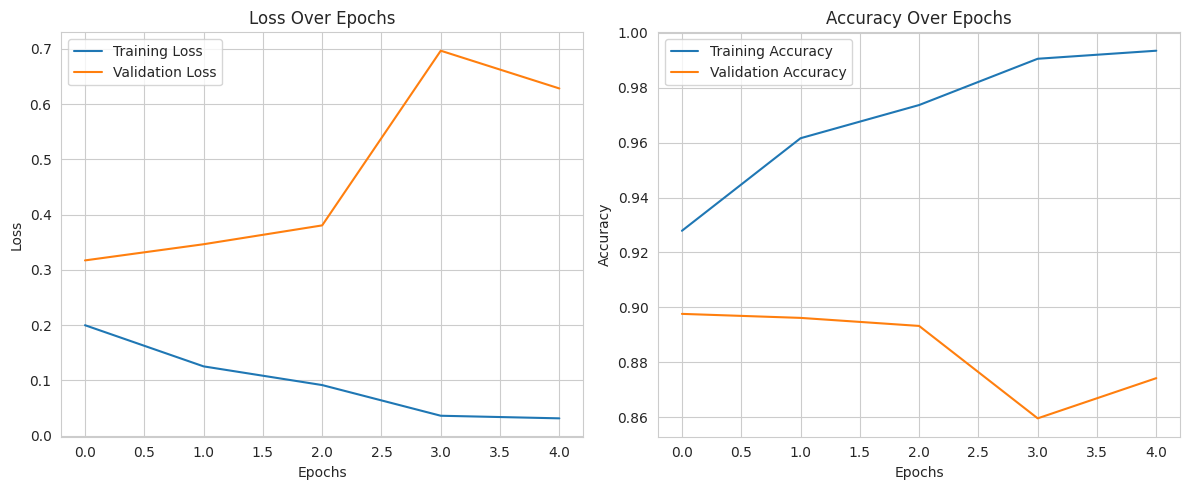

In [210]:
# Plot Training and Validation Loss and Accuracy
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

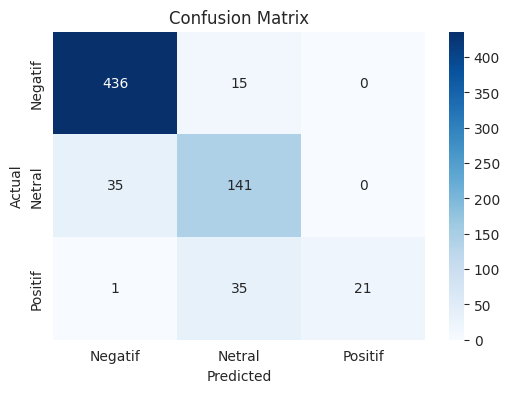

In [211]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [212]:
X = texts
y = encoded_labels

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, data.index, test_size=0.2, random_state=42)

# Gunakan indeks test untuk mengambil data asli
data_test = data.iloc[indices_test].reset_index(drop=True)

predictions = pd.DataFrame({
    'steming_data': data_test['steming_data'],
    'Actual': label_encoder.inverse_transform(y_test),
    'Predicted': label_encoder.inverse_transform(y_pred_classes)
})

# Simpan ke CSV
predictions.to_csv('Hasil_Predictions_lstm.csv', index=False)
predictions.head()

steming_data   Actual Predicted
0                               anak orang loh racun  Negatif   Negatif
1   mbg suruh makan bapak keluarga biar racun duluan  Negatif   Negatif
2          mati racun beliau pas makan mbg indonesia  Negatif   Negatif
3  eh persen anak manusia anak cicak emak ngamuk ...  Positif    Netral
4                aneh sih mbg ratus anak racun cuman  Negatif   Negatif

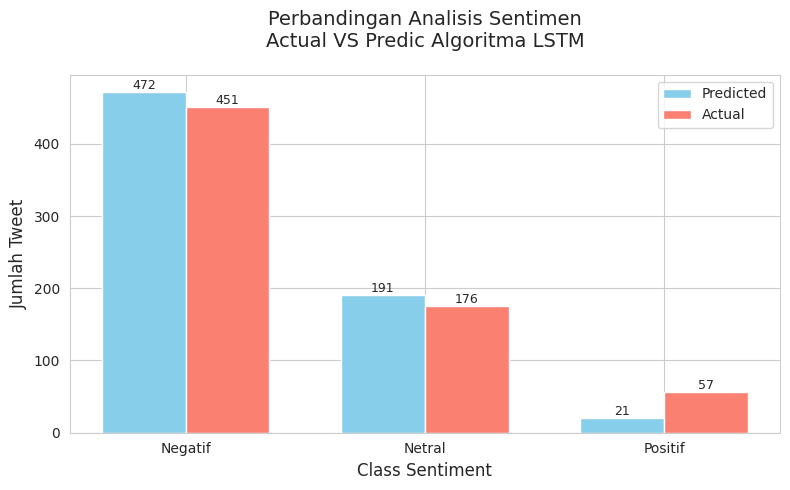

In [213]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

predicted_counts = predictions['Actual'].value_counts().sort_index()
actual_counts = predictions['Predicted'].value_counts().sort_index()

comparison_df = pd.DataFrame({
    'Predicted': actual_counts,
    'Actual': predicted_counts
}).fillna(0)

# Buat plot
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(8, 5))

bar_width = 0.35
index = range(len(comparison_df))

# Plot Actual
ax.bar([i - bar_width/2 for i in index], comparison_df['Predicted'], width=bar_width, label='Predicted', color='skyblue')

# Plot Predicted
ax.bar([i + bar_width/2 for i in index], comparison_df['Actual'], width=bar_width, label='Actual', color='salmon')

# Set label dan title
ax.set_xlabel('Class Sentiment', fontsize=12)
ax.set_ylabel('Jumlah Tweet', fontsize=12)
ax.set_title('Perbandingan Analisis Sentimen\nActual VS Predic Algoritma LSTM', fontsize=14, pad=20)
ax.set_xticks(index)
ax.set_xticklabels(comparison_df.index)
ax.legend()

# Tambahkan jumlah di atas bar
for i in index:
    actual = comparison_df['Predicted'].iloc[i]
    predicted = comparison_df['Actual'].iloc[i]
    ax.text(i - bar_width/2, actual + 0.01, int(actual), ha='center', va='bottom', fontsize=9)
    ax.text(i + bar_width/2, predicted + 0.01, int(predicted), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# ***Convolutional Neural Networks (CNN)***

In [214]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [215]:
# Load dataset
# Replace with your actual dataset
df = pd.read_csv('Hasil_Labelling_Data.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3416 entries, 0 to 3415
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   steming_data  3416 non-null   object
 1   Score         3416 non-null   int64 
 2   Sentiment     3416 non-null   object
dtypes: int64(1), object(2)
memory usage: 80.2+ KB


steming_data  Score Sentiment
0                                  anda racun syukur      0    Netral
1  mbg salah alur proses baik dapur mbg layan rib...      0    Netral
2            kampanye bilang ya bantu mbg dana china      1   Positif
3                       coba besok racun ethes omong     -1   Negatif
4                                     coba racun deh     -1   Negatif

In [216]:
data = pd.DataFrame(df[['steming_data','Sentiment']])
data.head(20)

steming_data Sentiment
0                                   anda racun syukur    Netral
1   mbg salah alur proses baik dapur mbg layan rib...    Netral
2             kampanye bilang ya bantu mbg dana china   Positif
3                        coba besok racun ethes omong   Negatif
4                                      coba racun deh   Negatif
5   negara wajib lindung anak mayoritas ribu anak ...    Netral
6   takut doa orangtua khawatir anak makan mbg ama...    Netral
7        habis gampar pakai ompreng otak goyang kacau   Negatif
8   ajar masak racun mbg siswa amp siswi masak bah...   Negatif
9   iya siswa siswi kelaperan sekolah biaya mbg al...    Netral
10          racun mbg usut program mbg nyundul langit   Negatif
11  siswa negeri kota salatiga masuk sekolah senin...    Netral
12                        senin moga berita racun mbg   Negatif
13  tekan kolaborasi lintas lembaga laksana mbg ti...   Negatif
14  tuju ya mbg ya masyarakat sehat nyata ya mbg l...    Netral
15  prabowo bacot doang gede kerja becus anak racu...   Negatif
16  ya dana mbg pakai bangun kantin hire tukang ma...    Netral
17  standar sppg polri zero racun teladan nasional...   Positif
18  kemenkes buka hotline adun masyarakat lapor al...    Netral
19  anak sekolah mbg cerdas statemen kepala bgn ra...    Netral

In [217]:
# Assuming 'steming_data' is the feature and 'Sentiment' is the target
texts = df['steming_data'].astype(str)
labels = df['Sentiment']

In [218]:
# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
y = to_categorical(encoded_labels)

In [219]:
# Tokenization and padding
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
X = tokenizer.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=100, padding='post')

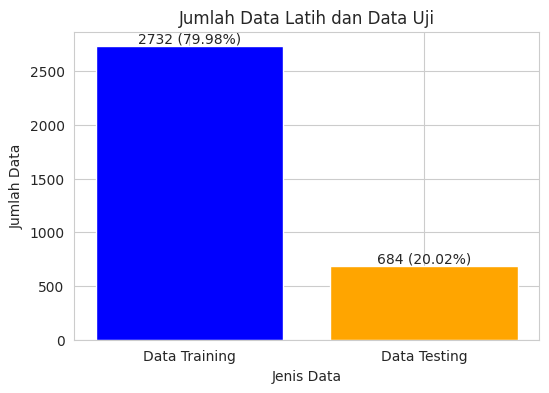

In [220]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

import matplotlib.pyplot as plt


train_size = len(X_train)
test_size = len(X_test)

plt.figure(figsize=(6, 4))
bars = plt.bar(['Data Training', 'Data Testing'], [train_size, test_size], color=['blue', 'orange'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height} ({height / (train_size + test_size) * 100:.2f}%)',
             ha='center', va='bottom')

plt.title('Jumlah Data Latih dan Data Uji')
plt.xlabel('Jenis Data')
plt.ylabel('Jumlah Data')
plt.show()

In [221]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2732, 100)
(2732, 3)
(684, 100)
(684, 3)


In [222]:
# Define CNN model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # Assuming 3 sentiment classes (modify if needed)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [223]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.6218 - loss: 0.8519 - val_accuracy: 0.8227 - val_loss: 0.5155
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.8454 - loss: 0.4432 - val_accuracy: 0.8629 - val_loss: 0.3409
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.9248 - loss: 0.2152 - val_accuracy: 0.9159 - val_loss: 0.2304
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.9777 - loss: 0.0857 - val_accuracy: 0.9269 - val_loss: 0.2084
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.9888 - loss: 0.0449 - val_accuracy: 0.9360 - val_loss: 0.1825
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.9954 - loss: 0.0213 - val_accuracy: 0.9378 - val_loss: 0.1996
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.9978 - loss: 0.0148 - val_accuracy: 0.9342 - val_loss: 0.1906
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.9994 - loss: 0.0075 - val_accuracy: 0.9287 - v

In [224]:
# Evaluate model
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [225]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy (desimal): {accuracy:.2f}')
print(f'Accuracy (persen): {accuracy * 100:.2f}%')
print()

# Classification Report
class_report = classification_report(y_true, y_pred, target_names=label_encoder.classes_)
print('Classification Report:')
print(class_report)

Accuracy (desimal): 0.94
Accuracy (persen): 93.86%

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.98      0.97      0.98       451
      Netral       0.85      0.94      0.89       176
     Positif       0.93      0.68      0.79        57

    accuracy                           0.94       684
   macro avg       0.92      0.86      0.88       684
weighted avg       0.94      0.94      0.94       684



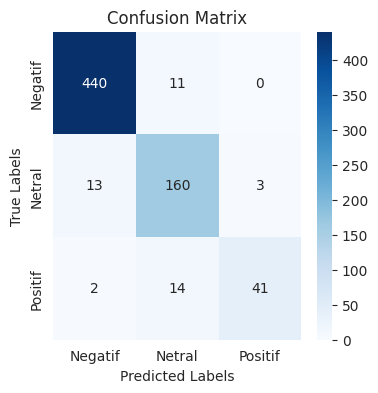

In [127]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

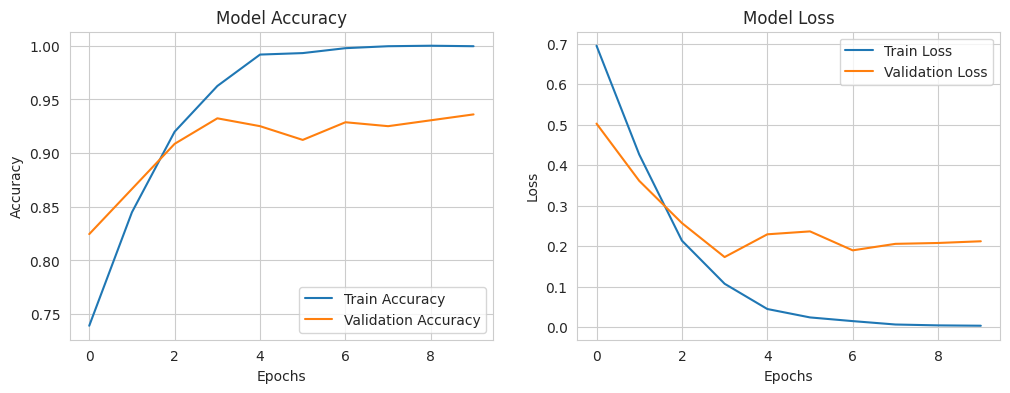

In [128]:
# Plot Accuracy and Loss over epochs
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [130]:
actual_labels = label_encoder.inverse_transform(y_true)
predicted_labels = label_encoder.inverse_transform(y_pred)

data = df.iloc[X_test.shape[0]:].copy()

data = pd.DataFrame({'steming_data': df['steming_data'].iloc[X_train.shape[0]:],
                   'Sentiment': actual_labels,
                   'Predicted': predicted_labels})

data.to_csv('hasil_klasifikasi.csv', index=False)
data.head()


steming_data Sentiment Predicted
2732                           mudah anak cuculuh racun   Negatif   Negatif
2733                               suruh anak makan mbg   Negatif   Negatif
2734  stop mbg dana buka lapang kerja bangun pelosok...   Negatif   Negatif
2735       racun anggep wajar coba deh racun biar rasai   Positif   Negatif
2736                          moga keluarga racun bangs   Negatif   Negatif

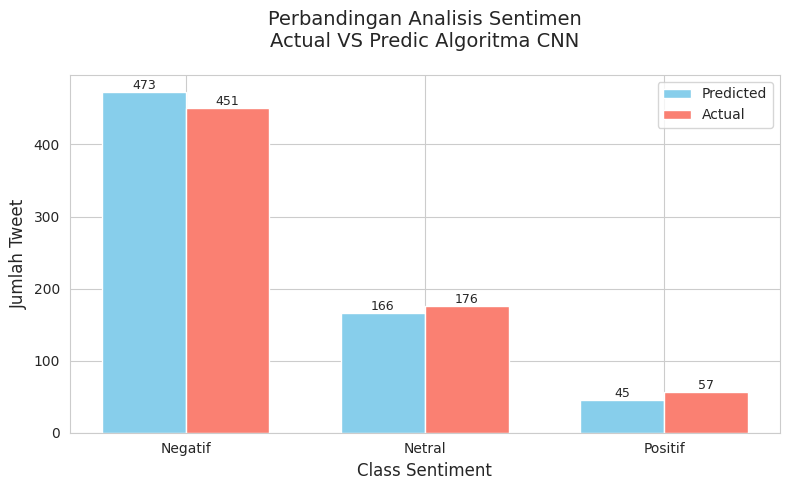

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

predicted_counts = predictions['Actual'].value_counts().sort_index()
actual_counts = predictions['Predicted'].value_counts().sort_index()

comparison_df = pd.DataFrame({
    'Predicted': actual_counts,
    'Actual': predicted_counts
}).fillna(0)

# Buat plot
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(8, 5))

bar_width = 0.35
index = range(len(comparison_df))

# Plot Actual
ax.bar([i - bar_width/2 for i in index], comparison_df['Predicted'], width=bar_width, label='Predicted', color='skyblue')

# Plot Predicted
ax.bar([i + bar_width/2 for i in index], comparison_df['Actual'], width=bar_width, label='Actual', color='salmon')

# Set label dan title
ax.set_xlabel('Class Sentiment', fontsize=12)
ax.set_ylabel('Jumlah Tweet', fontsize=12)
ax.set_title('Perbandingan Analisis Sentimen\nActual VS Predic Algoritma CNN', fontsize=14, pad=20)
ax.set_xticks(index)
ax.set_xticklabels(comparison_df.index)
ax.legend()

# Tambahkan jumlah di atas bar
for i in index:
    actual = comparison_df['Predicted'].iloc[i]
    predicted = comparison_df['Actual'].iloc[i]
    ax.text(i - bar_width/2, actual + 0.01, int(actual), ha='center', va='bottom', fontsize=9)
    ax.text(i + bar_width/2, predicted + 0.01, int(predicted), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [227]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping


In [229]:
# Pastikan input berupa list of string
X_train = [str(x) for x in X_train]
X_test  = [str(x) for x in X_test]

tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq  = tokenizer.texts_to_sequences(X_test)

max_len = 100
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_padded  = pad_sequences(X_test_seq,  maxlen=max_len, padding='post', truncating='post')


In [237]:
max_len = 100
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post').astype('int32')
X_test_padded  = pad_sequences(X_test_seq,  maxlen=max_len, padding='post', truncating='post').astype('int32')

vocab_size = len(tokenizer.word_index) + 1

In [238]:
# ✅ hybrid CNN + LSTM
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
    Conv1D(128, 5, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # gunakan ini jika y_train one-hot
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

print(model.summary())

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_7 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_8 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [239]:
history = model.fit(
    X_train_padded, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 21s 283ms/step - accuracy: 0.5720 - loss: 0.9349 - val_accuracy: 0.8227 - val_loss: 0.5693
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 224ms/step - accuracy: 0.8266 - loss: 0.5158 - val_accuracy: 0.8355 - val_loss: 0.4482
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 218ms/step - accuracy: 0.8835 - loss: 0.3175 - val_accuracy: 0.8702 - val_loss: 0.3701
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 260ms/step - accuracy: 0.9403 - loss: 0.1569 - val_accuracy: 0.8775 - val_loss: 0.3633
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 263ms/step - accuracy: 0.9705 - loss: 0.0834 - val_accuracy: 0.9086 - val_loss: 0.3119
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 243ms/step - accuracy: 0.9895 - loss: 0.0415 - val_accuracy: 0.9068 - val_loss: 0.3658
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 257ms/step - accuracy: 0.9961 - loss: 0.0163 - val_accuracy: 0.9141 - val_loss: 0.3964
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 261ms/step - accuracy: 0.9971 - loss: 0.0168 - val_accuracy: 

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
              precision    recall  f1-score   support

     Negatif       0.98      0.97      0.97       451
      Netral       0.80      0.93      0.86       176
     Positif       0.94      0.53      0.67        57

    accuracy                           0.92       684
   macro avg       0.91      0.81      0.84       684
weighted avg       0.93      0.92      0.92       684



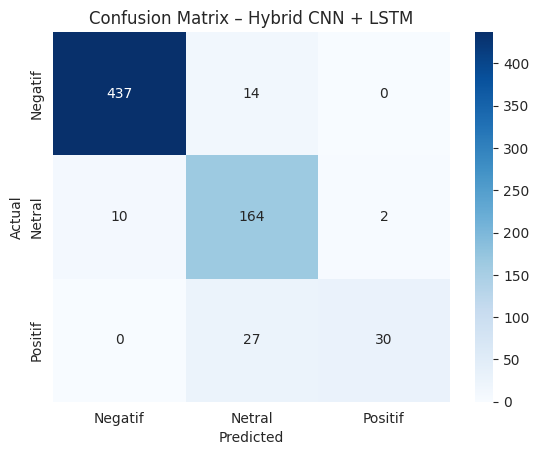

✅ Accuracy (decimal): 0.9225
✅ Accuracy (percent): 92.25%


In [242]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test_padded)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1) if len(y_test.shape)>1 else y_test

print(classification_report(y_true, y_pred, target_names=['Negatif','Netral','Positif']))

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negatif','Netral','Positif'],
            yticklabels=['Negatif','Netral','Positif'])
plt.title('Confusion Matrix – Hybrid CNN + LSTM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
accuracy = accuracy_score(y_true, y_pred)
print(f'✅ Accuracy (decimal): {accuracy:.4f}')
print(f'✅ Accuracy (percent): {accuracy * 100:.2f}%')


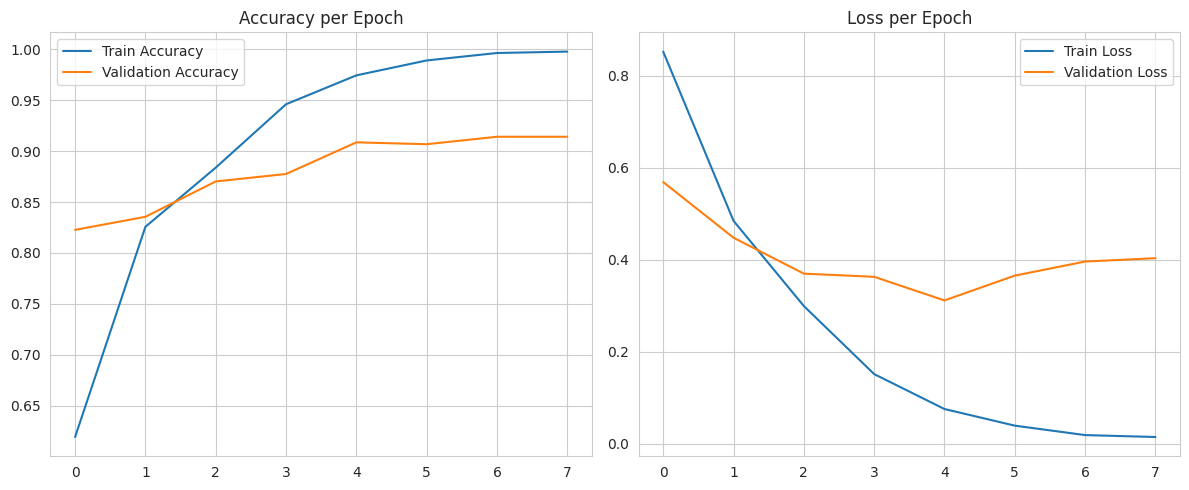

In [243]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss per Epoch')
plt.legend()

plt.tight_layout()
plt.show()


In [244]:
model.save("hybrid_cnn_lstm_model.h5")
print("✅ Model saved as hybrid_cnn_lstm_model.h5")


✅ Model saved as hybrid_cnn_lstm_model.h5


In [ ]:
from tensorflow.keras.models import load_model

# --- Load model ---
model = load_model("hybrid_cnn_lstm_model.h5")

print("✅ Model berhasil dimuat kembali!")
model.summary()   # tampilkan arsitektur model